<a href="https://colab.research.google.com/github/PreyPython123/Master-V24-Semiveiledet-Regresjon/blob/Variabelunders%C3%B8kelse-Pradeep/Bioco_Variabelunders%C3%B8kelse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importering av nødvendige bibliotek og pakker

In [1]:
import pandas as pd
import numpy as np
import copy

import seaborn as sns
import matplotlib.pyplot as plt

Importering av data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Velger første kolonne med dato og tid som index
behandlet_data = pd.read_csv('/content/drive/MyDrive/MasterV24/Bioco_data/ekstremverdi_data_behandlet_bioco_data.csv',
                             header=0,
                             sep=',',
                             index_col=0)

# Importerer rådata
rå_data = pd.read_csv('/content/drive/MyDrive/MasterV24/BiocoData.csv',
                      header=0,
                      sep=';',
                      index_col=0)

# Formatterer index til riktig format og datatype
behandlet_data.index = pd.to_datetime(behandlet_data.index,
                                      format='%Y-%m-%d %H:%M:%S')

rå_data.index = pd.to_datetime(rå_data.index,
                               format='%d-%m-%Y %H:%M:%S.%f')

Mounted at /content/drive


# Dataforståelse av behandlet datasett

Informasjon om antall observasjoner for hver kolonne

In [3]:
behandlet_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29136 entries, 2022-10-31 17:37:00 to 2023-06-14 01:06:00
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EnzymeType_A1   29136 non-null  int64  
 1   EnzymeType_A2   29136 non-null  int64  
 2   EnzymeType_B    29136 non-null  int64  
 3   EnzymeType_C    29136 non-null  int64  
 4   EnzymeType_D    29136 non-null  int64  
 5   EnzymeType_E    29136 non-null  int64  
 6   RawMatPercent   29136 non-null  float64
 7   NIRfat          29136 non-null  float64
 8   NIRash          29136 non-null  float64
 9   NIRwater        29136 non-null  float64
 10  TT08            29136 non-null  float64
 11  TT20            29136 non-null  float64
 12  TT12            29136 non-null  float64
 13  Collagen        89 non-null     float64
 14  Mw              460 non-null    float64
 15  SmallMolecules  460 non-null    float64
 16  BrixAdjusted    460 non-null    float64
d

## Fordeling i variabler i behandlet datasett

Lager kopi for merinformasjon om tid og enzymtype

In [4]:
# Legger til uke og dagsinformasjon
behandlet_data_tid = copy.deepcopy(behandlet_data)
behandlet_data_tid['Week'] = behandlet_data.index.isocalendar().week
behandlet_data_tid['Day'] = (behandlet_data_tid.index.isocalendar().day)

# Enzymtyper
enzym_data = rå_data.merge(behandlet_data_tid,
                                left_index=True,
                                right_index=True,
                                how='inner',
                                suffixes=('','_drop'))['EnzymeCode']

# Legger til enzymtypeinformasjon og ekskluderer "labelancodet"-kolonner for
# enzymer
behandlet_data_tid = pd.concat([behandlet_data_tid, enzym_data], axis=1)
behandlet_data_tid = behandlet_data_tid.iloc[:, 6:]

Fordeling i variablene for hele datasettet med uke- og dagsinformasjon

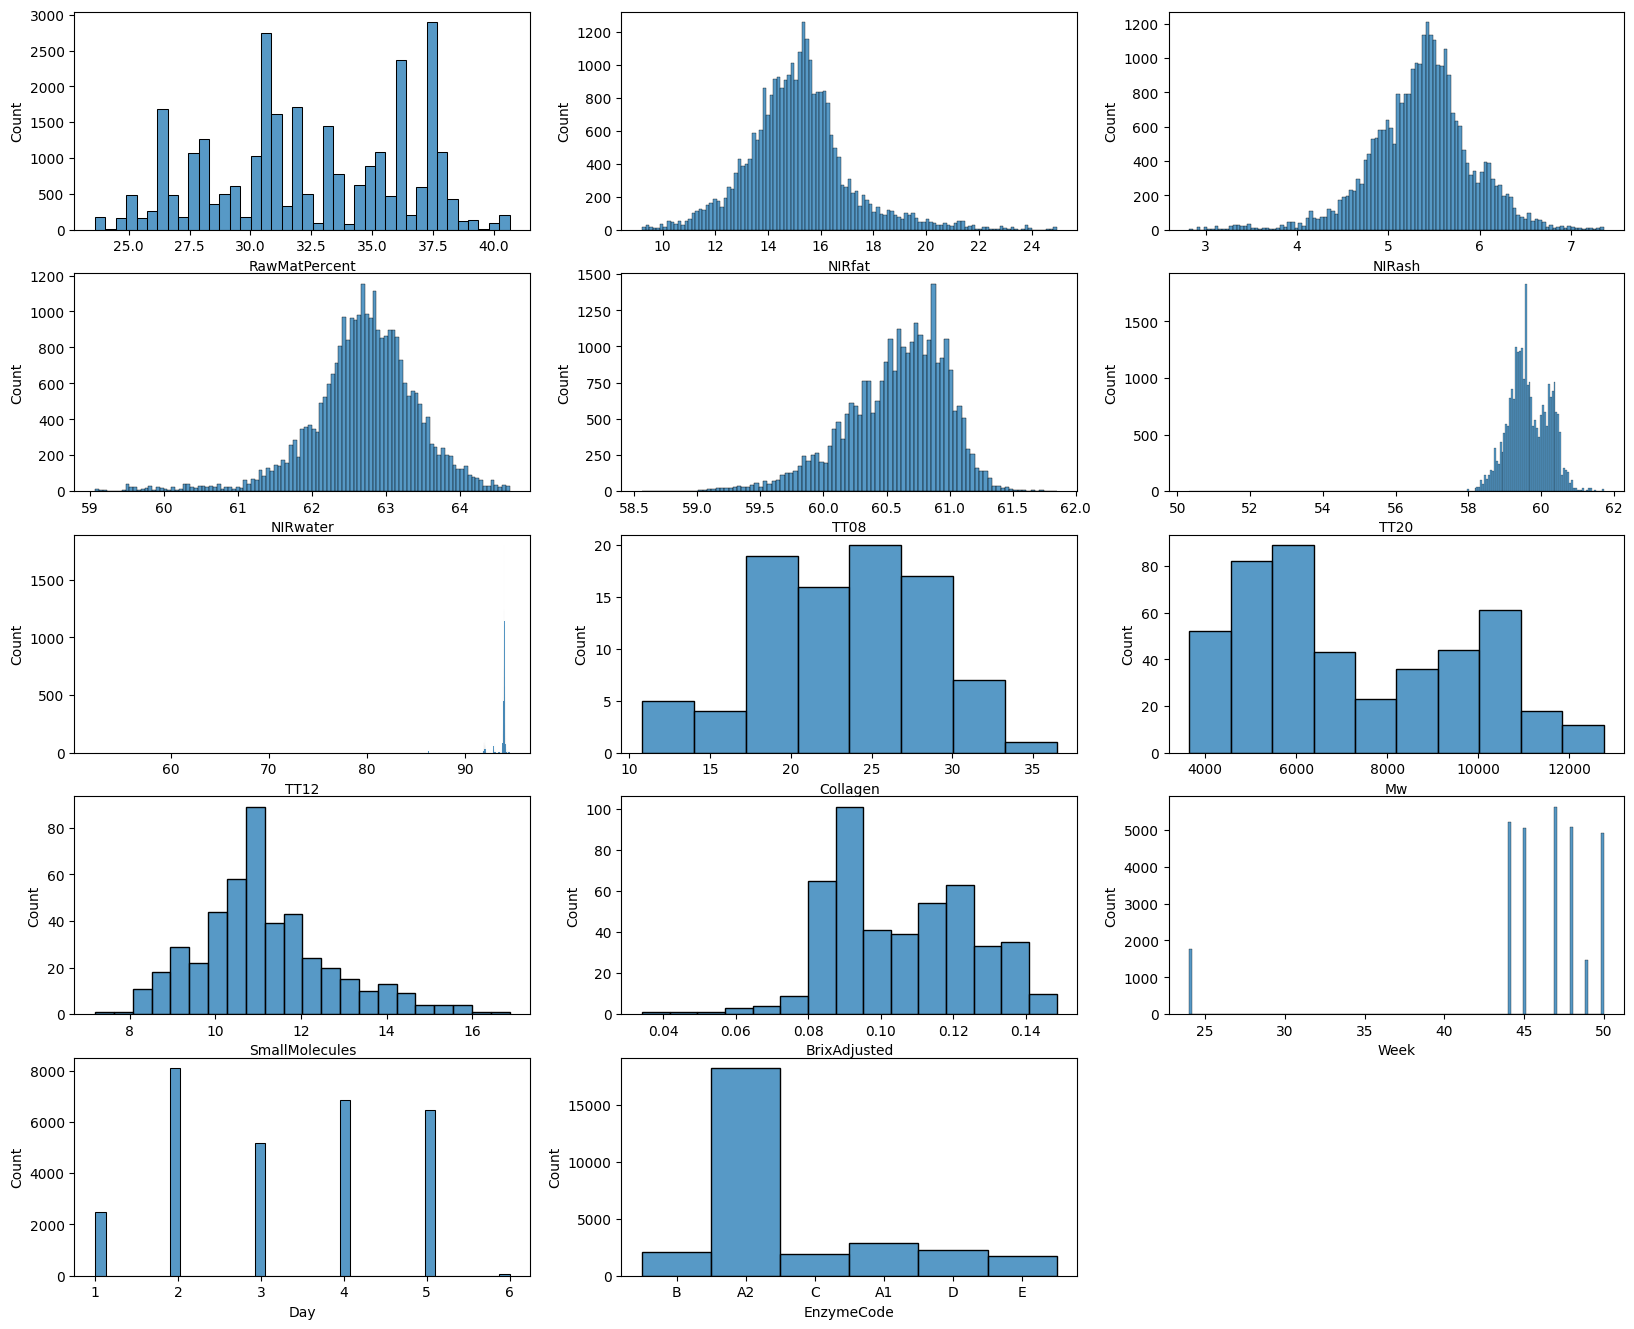

In [5]:
fig = plt.figure(figsize=(20,30))
antall_kolonnner = len(behandlet_data_tid.columns)
rute_nett = fig.add_gridspec(9,3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), behandlet_data_tid):
  if nummer % 3 == 0:
    n += 1
    i = 0
  ax = fig.add_subplot(rute_nett[n,i])
  sns.histplot(x=indeks, data = behandlet_data_tid)
  i += 1

Fordeling av Enzymtyper i hele datasett

In [6]:
# Fordelingen i "EnzymeCode"

frekvens = behandlet_data_tid['EnzymeCode'].value_counts()
andel = behandlet_data_tid['EnzymeCode'].value_counts(normalize=True) * 100

enzymtyper_data = pd.DataFrame({
    'Frekvens': frekvens,
    'Andel': andel
})

print(enzymtyper_data)

    Frekvens      Andel
A2     18233  62.578940
A1      2845   9.764552
D       2256   7.742998
B       2113   7.252197
C       1916   6.576057
E       1773   6.085255


Fordeling i markert del av datasettet

In [7]:
# Lager et datasett for Collagen med mindre markeringer enn resterende kvalitesmålinger
collagen_markert = behandlet_data_tid.dropna(subset=['Collagen'])

# Lager et datasett for de resterende kvalitetsmålinger
kvalitetsmålinger_markert = behandlet_data_tid.dropna(subset=['Mw',
                                                          'SmallMolecules',
                                                          'BrixAdjusted'])

Fordeling i datasett med Collagen som markert respons

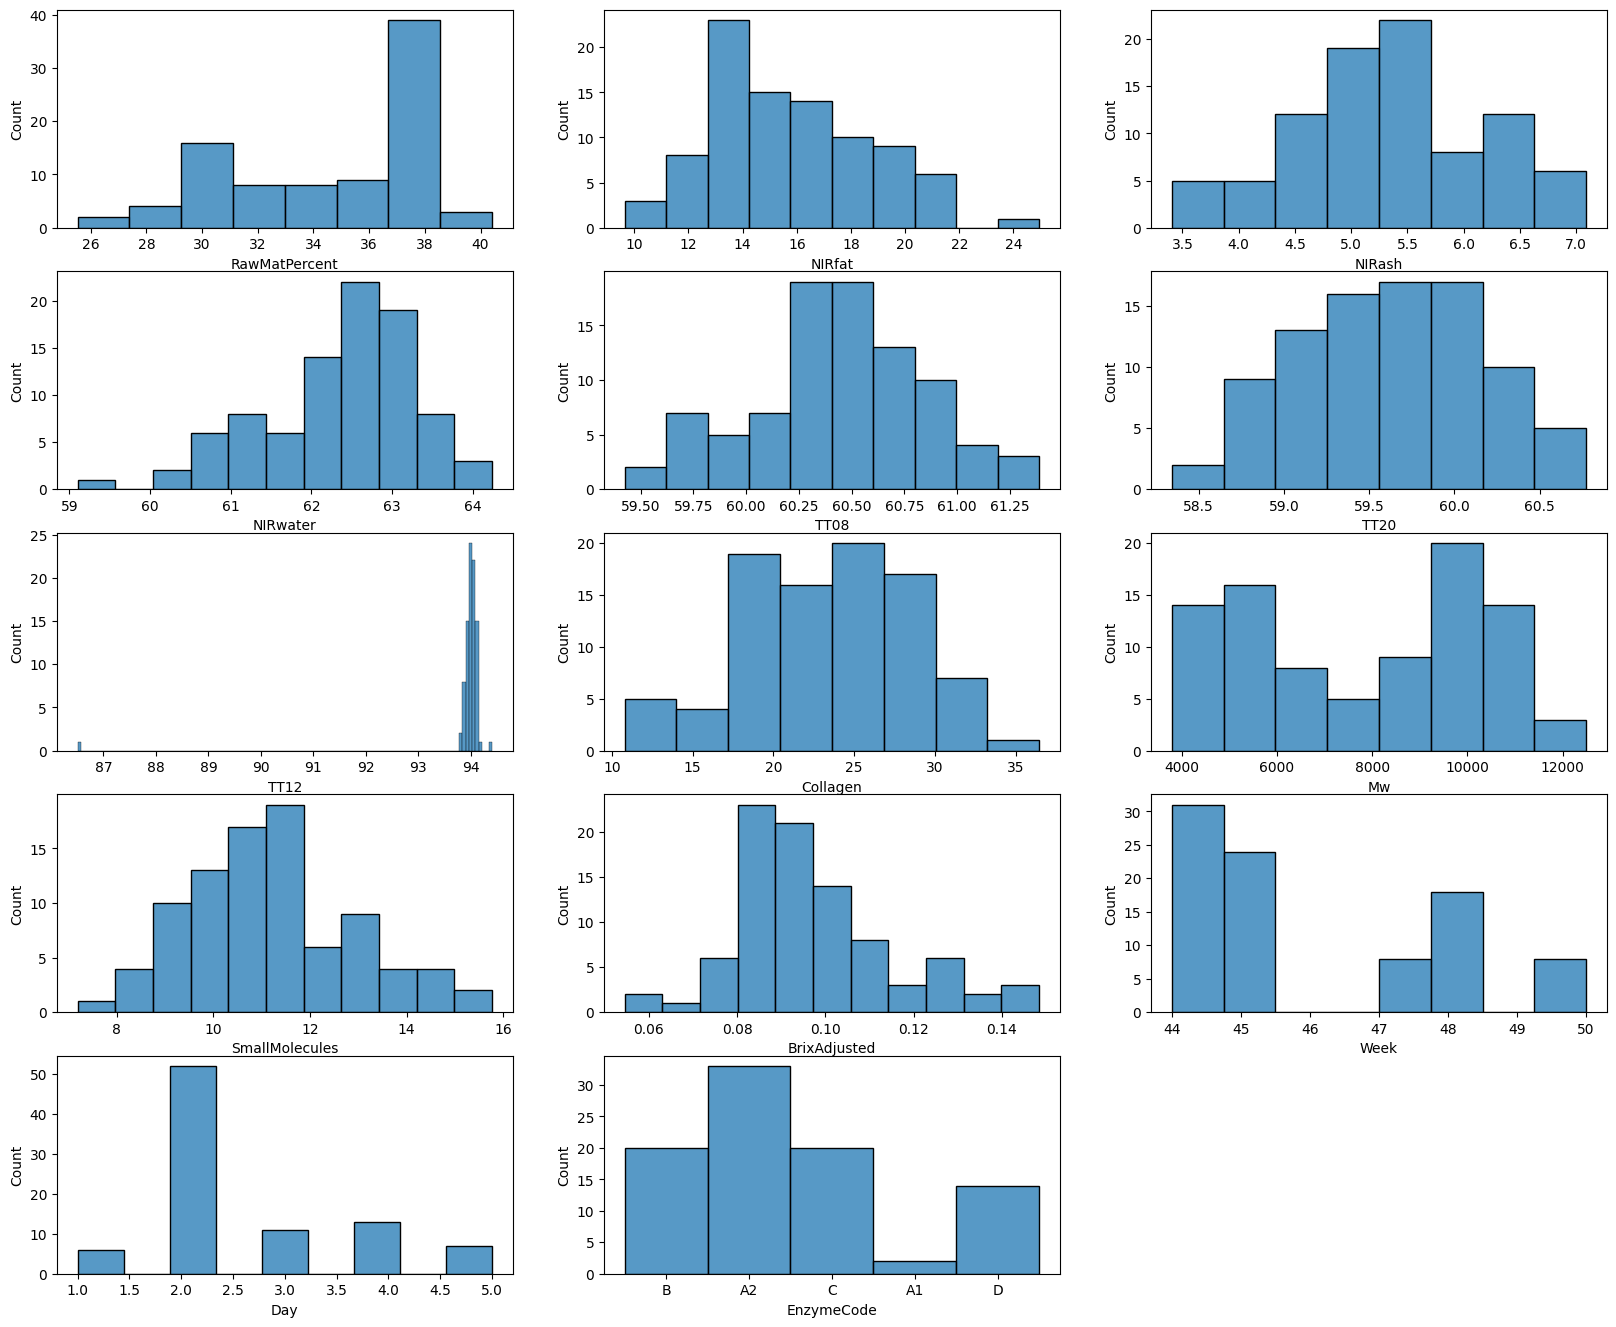

In [8]:
fig = plt.figure(figsize=(20,30))
antall_kolonnner = len(collagen_markert.columns)
rute_nett = fig.add_gridspec(9,3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), collagen_markert):
  if nummer % 3 == 0:
    n += 1
    i = 0
  ax = fig.add_subplot(rute_nett[n,i])
  sns.histplot(x=indeks, data = collagen_markert)
  i += 1

Fordeling av Enzymtyper i datasett med Collagen som respons

In [9]:
# Fordelingen i "EnzymeCode"

frekvens = collagen_markert['EnzymeCode'].value_counts()
andel = collagen_markert['EnzymeCode'].value_counts(normalize=True) * 100

enzymtyper_data = pd.DataFrame({
    'Frekvens': frekvens,
    'Andel': andel
})

print(enzymtyper_data)

    Frekvens      Andel
A2        33  37.078652
B         20  22.471910
C         20  22.471910
D         14  15.730337
A1         2   2.247191


Fordeling i datasett med resterende kvalitetsmålinger som markert respons

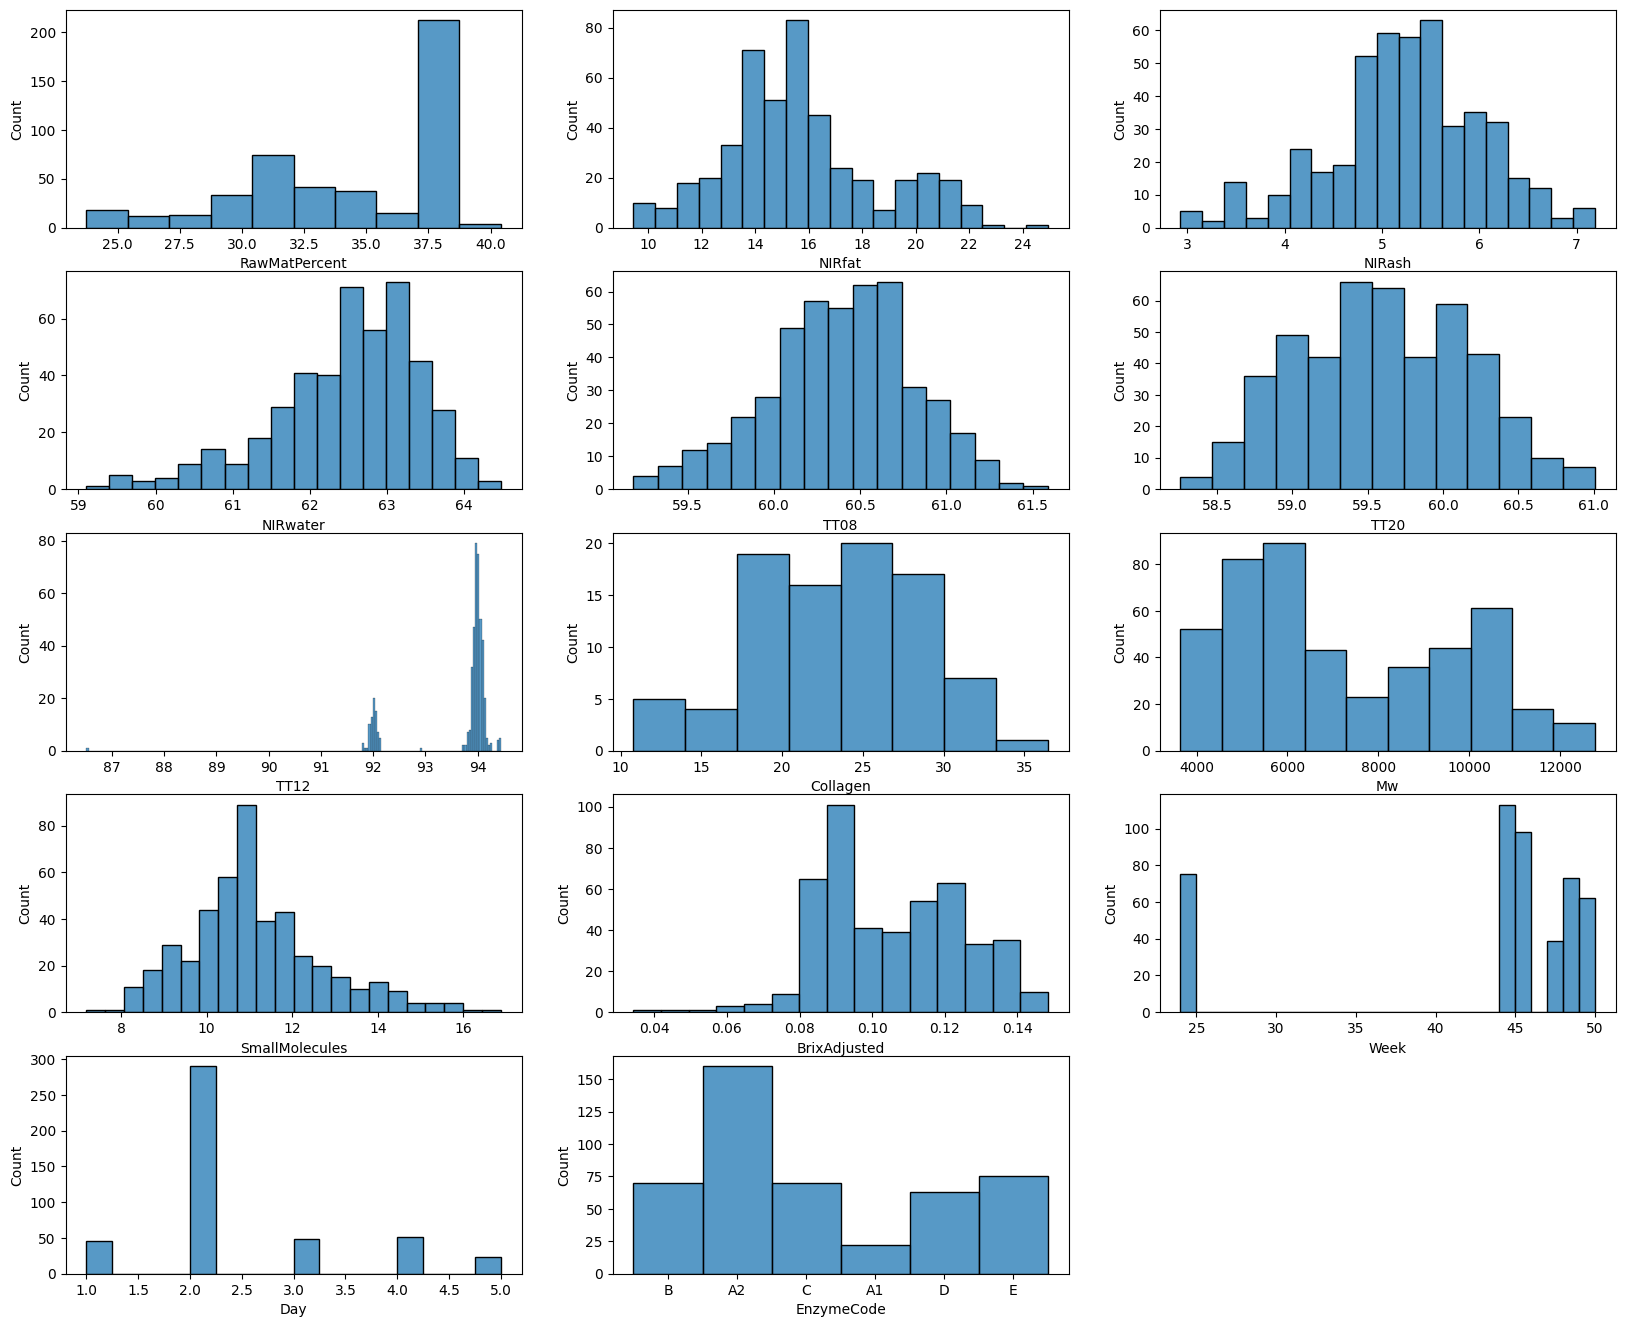

In [10]:
fig = plt.figure(figsize=(20,30))
antall_kolonnner = len(kvalitetsmålinger_markert.columns)
rute_nett = fig.add_gridspec(9,3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), kvalitetsmålinger_markert):
  if nummer % 3 == 0:
    n += 1
    i = 0
  ax = fig.add_subplot(rute_nett[n,i])
  sns.histplot(x=indeks, data = kvalitetsmålinger_markert)
  i += 1

Fordeling av Enzymtyper i datasett med andre kvalitetsmålinger som respons

In [11]:
# Fordelingen i "EnzymeCode"

frekvens = kvalitetsmålinger_markert['EnzymeCode'].value_counts()
andel = kvalitetsmålinger_markert['EnzymeCode'].value_counts(normalize=True) * 100

enzymtyper_data = pd.DataFrame({
    'Frekvens': frekvens,
    'Andel': andel
})

print(enzymtyper_data)

    Frekvens      Andel
A2       160  34.782609
E         75  16.304348
B         70  15.217391
C         70  15.217391
D         63  13.695652
A1        22   4.782609


Fordeling i umarkert del av datasettet

In [12]:
# Lager et datasett for Collagen med mindre markeringer enn resterende kvalitesmålinger
collagen_umarkert = behandlet_data_tid[behandlet_data_tid['Collagen'].isna()]


# Lager et datasett for de resterende kvalitetsmålinger
kvalitetsmålinger_umarkert = behandlet_data_tid[behandlet_data_tid['Mw'].isna()]

Fordeling i datasett med Collagen som markert respons

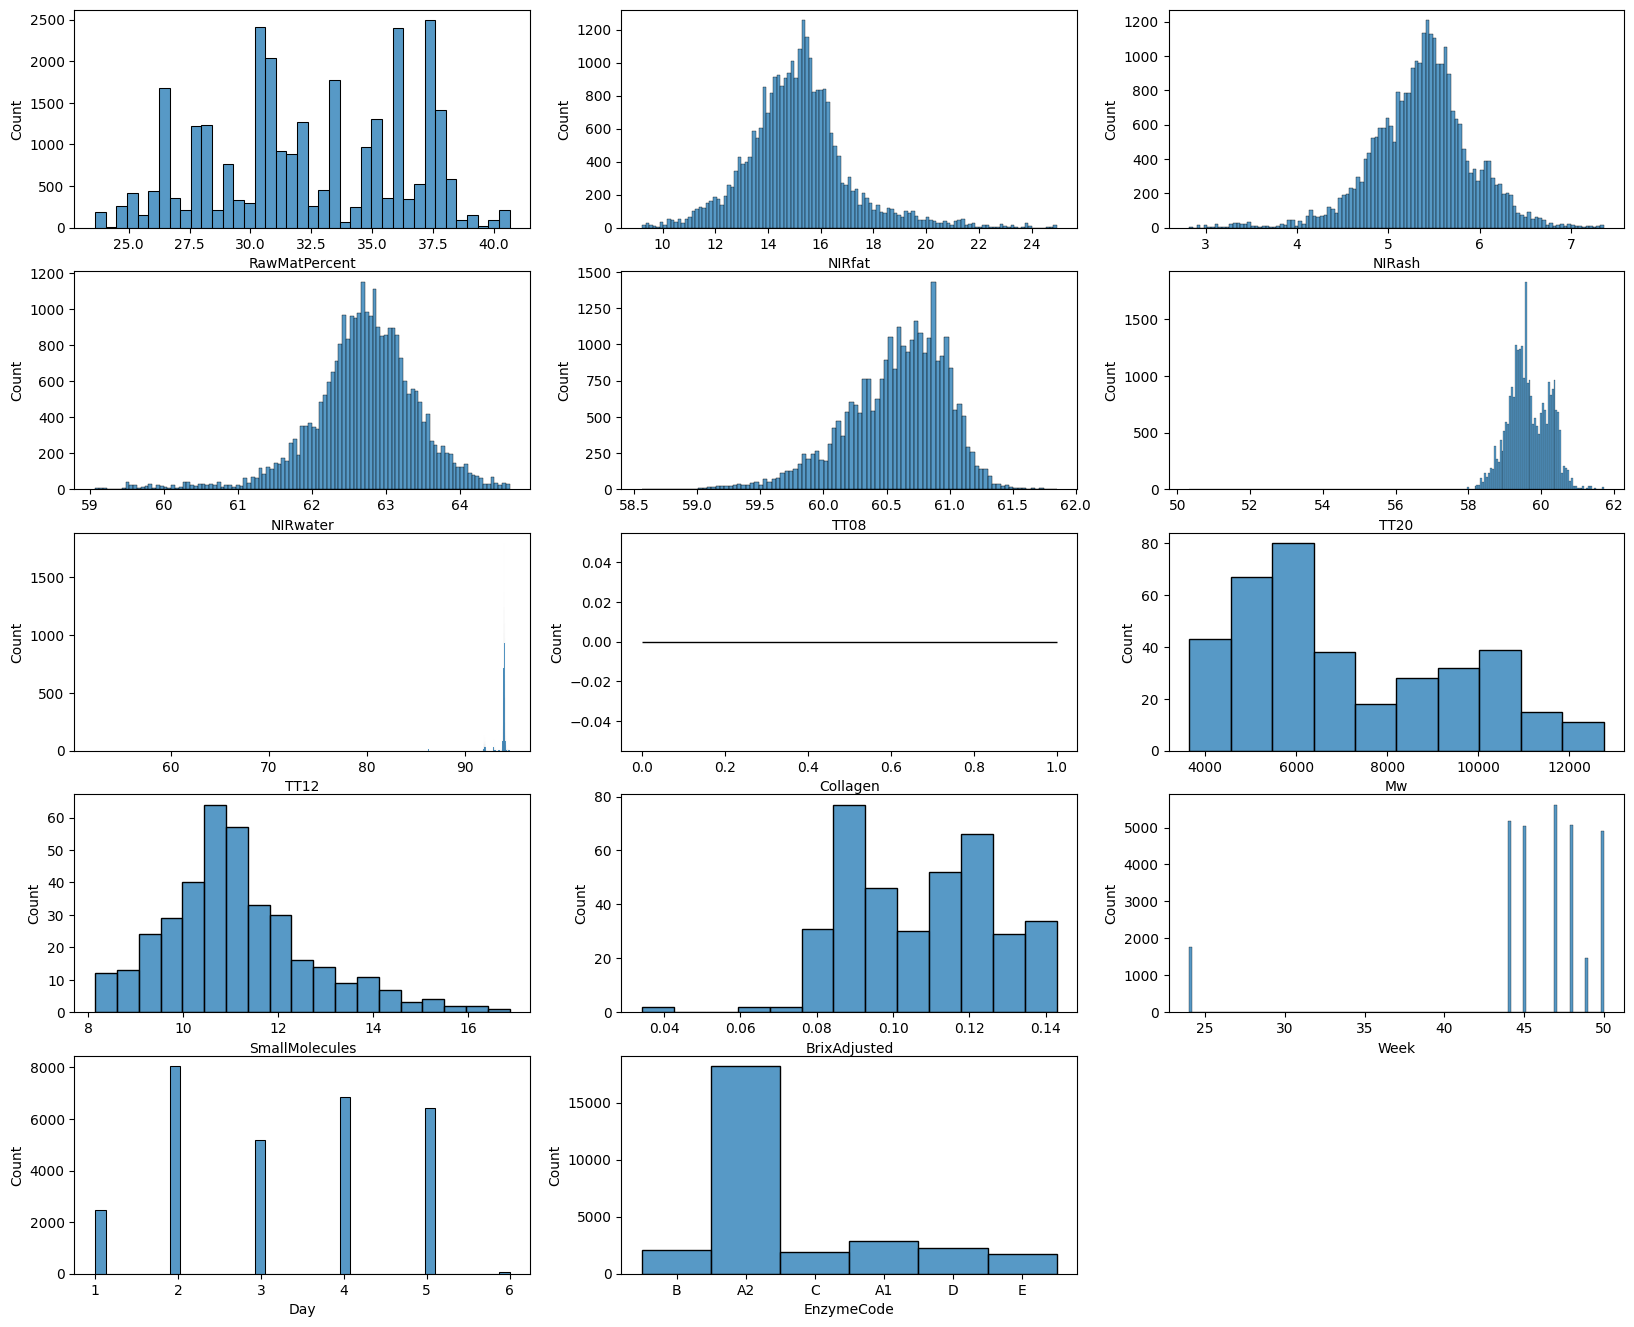

In [13]:
fig = plt.figure(figsize=(20,30))
antall_kolonnner = len(collagen_umarkert.columns)
rute_nett = fig.add_gridspec(9,3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), collagen_umarkert):
  if nummer % 3 == 0:
    n += 1
    i = 0
  ax = fig.add_subplot(rute_nett[n,i])
  sns.histplot(x=indeks, data = collagen_umarkert)
  i += 1

Fordeling av Enzymtyper i datasett med Collagen som umarkert respons

In [14]:
# Fordelingen i "EnzymeCode"

frekvens = collagen_umarkert['EnzymeCode'].value_counts()
andel = collagen_umarkert['EnzymeCode'].value_counts(normalize=True) * 100

enzymtyper_data = pd.DataFrame({
    'Frekvens': frekvens,
    'Andel': andel
})

print(enzymtyper_data)

    Frekvens      Andel
A2     18200  62.657073
A1      2843   9.787586
D       2242   7.718525
B       2093   7.205563
C       1896   6.527352
E       1773   6.103901


Fordeling i datasett med resterende kvalitetsmålinger som markert respons

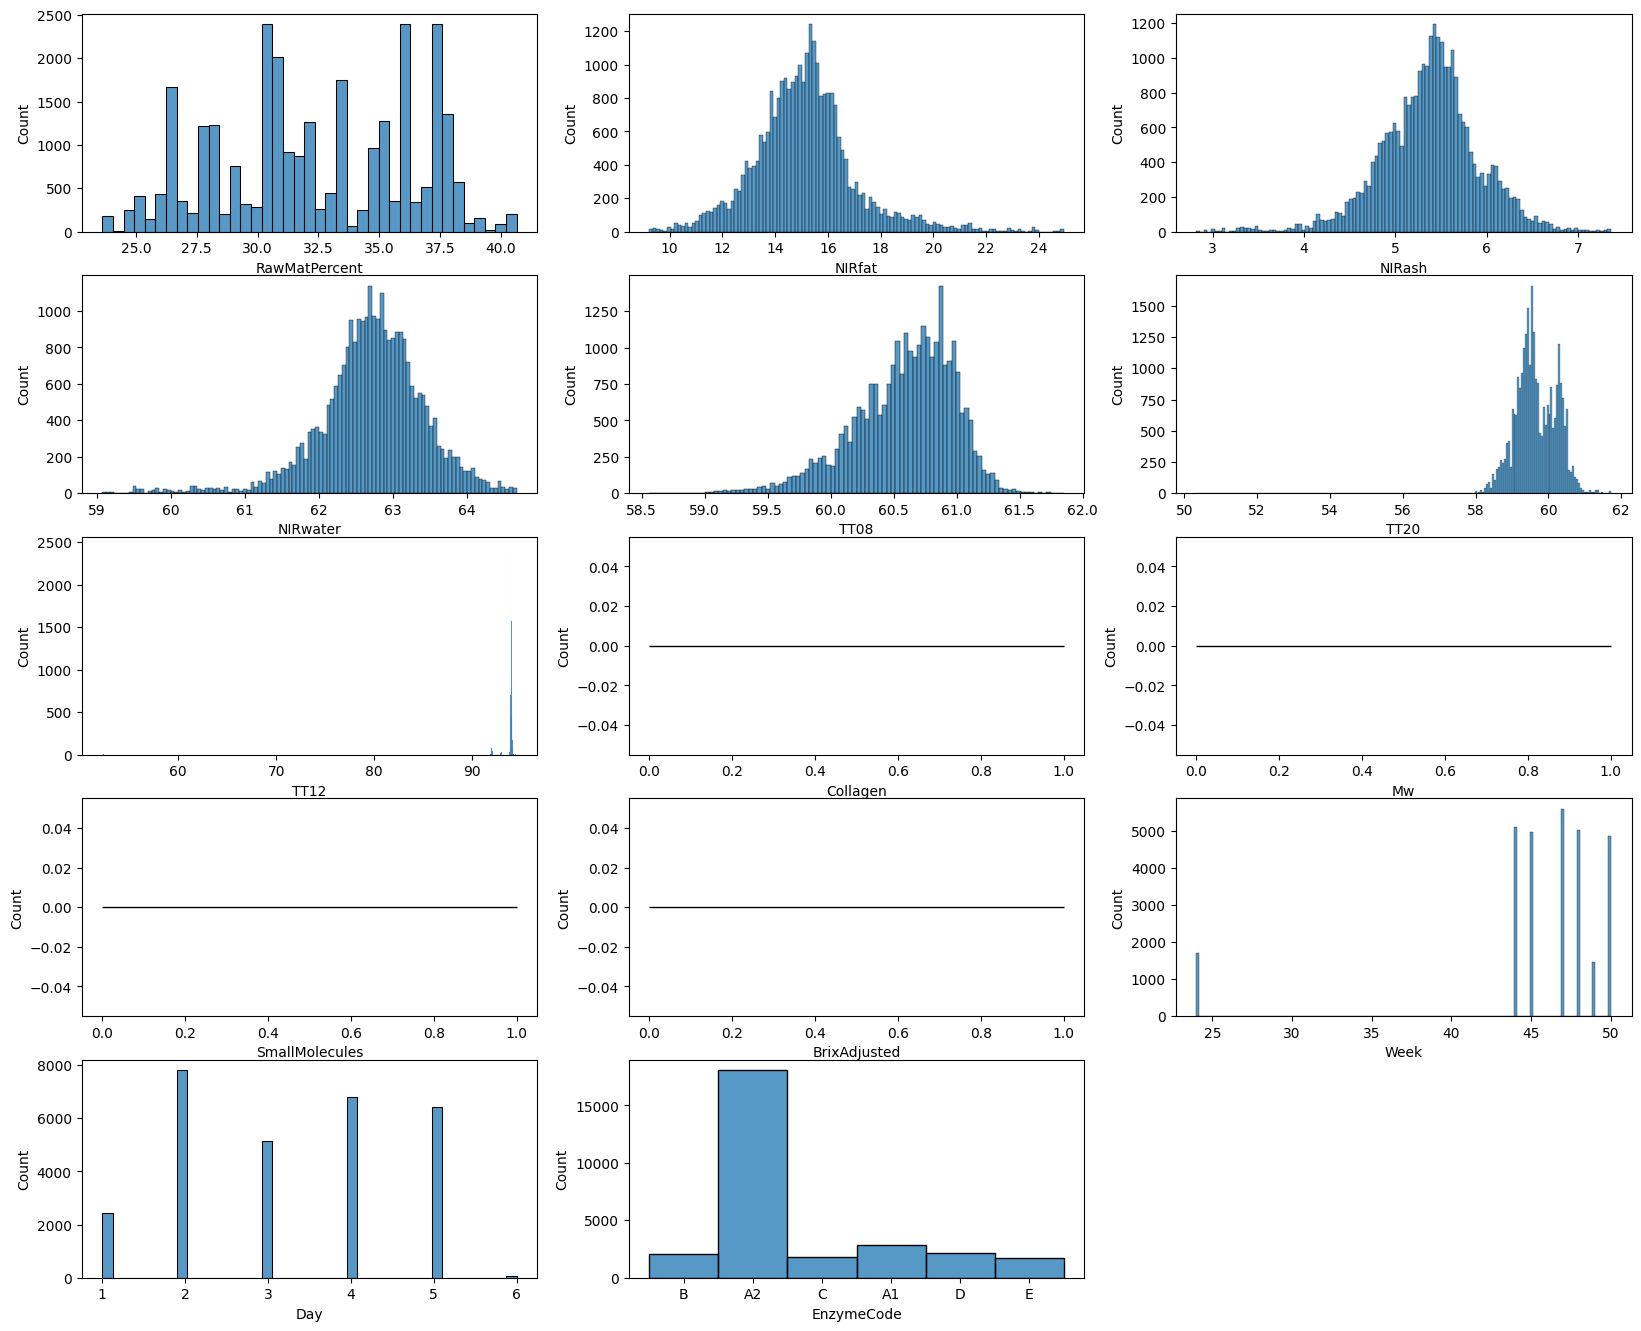

In [15]:
fig = plt.figure(figsize=(20,30))
antall_kolonnner = len(kvalitetsmålinger_umarkert.columns)
rute_nett = fig.add_gridspec(9,3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), kvalitetsmålinger_umarkert):
  if nummer % 3 == 0:
    n += 1
    i = 0
  ax = fig.add_subplot(rute_nett[n,i])
  sns.histplot(x=indeks, data = kvalitetsmålinger_umarkert)
  i += 1

Fordeling av Enzymtyper i datasett med andre kvalitetsmålinger som umarkert respons

In [16]:
# Fordelingen i "EnzymeCode"

frekvens = kvalitetsmålinger_umarkert['EnzymeCode'].value_counts()
andel = kvalitetsmålinger_umarkert['EnzymeCode'].value_counts(normalize=True) * 100

enzymtyper_data = pd.DataFrame({
    'Frekvens': frekvens,
    'Andel': andel
})

print(enzymtyper_data)

    Frekvens      Andel
A2     18073  63.024829
A1      2823   9.844469
D       2193   7.647510
B       2043   7.124425
C       1846   6.437439
E       1698   5.921328


## Korrelasjon

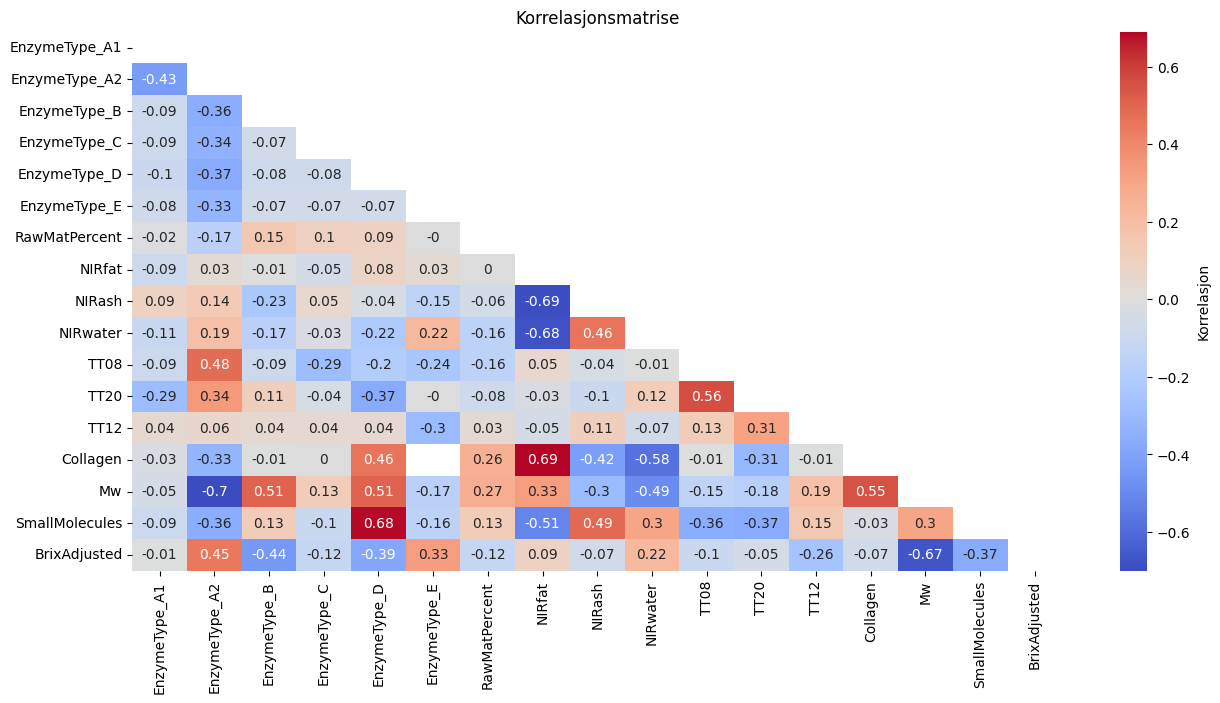

In [17]:
# Lager en korrelasjonsmatrise med annotering
korrelasjon_matrise = behandlet_data.corr()

# Runder av til 2 desimaler for bedre lesbarhet
korrelasjon_matrise_avrundet = korrelasjon_matrise.round(2)

# Triangulær matrise
maske = np.triu(np.ones_like(korrelasjon_matrise_avrundet,
                             dtype=bool))

plt.figure(figsize=(15, 7))
sns.heatmap(korrelasjon_matrise_avrundet,
            annot=True,
            mask=maske,
            cmap='coolwarm',
            cbar_kws={'label': 'Korrelasjon'})
plt.title("Korrelasjonsmatrise")
plt.show()

# Dataforståelse av behandlet datasett: Normal produksjon

Oppdeling av data for hver kvalitetsmåling under normal produksjon

In [35]:
behandlet_data_normalprod = copy.deepcopy(behandlet_data)
behandlet_data_normalprod['Day'] = (behandlet_data_normalprod.index.isocalendar().day)

# Ekskluderer de dager med "design"-produksjon
behandlet_data_normalprod = behandlet_data_normalprod[~behandlet_data_normalprod['Day'].isin([1,2])]

enzym_data = rå_data.merge(behandlet_data_normalprod,
                                left_index=True,
                                right_index=True,
                                how='inner',
                                suffixes=('','_drop'))['EnzymeCode']

behandlet_data_normalprod_enzym = pd.concat([behandlet_data_normalprod, enzym_data], axis=1)
behandlet_data_normalprod_enzym = behandlet_data_normalprod_enzym.iloc[:, 6:]

In [36]:
behandlet_data_normalprod_enzym.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18568 entries, 2022-11-02 00:00:00 to 2023-06-14 01:06:00
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RawMatPercent   18568 non-null  float64
 1   NIRfat          18568 non-null  float64
 2   NIRash          18568 non-null  float64
 3   NIRwater        18568 non-null  float64
 4   TT08            18568 non-null  float64
 5   TT20            18568 non-null  float64
 6   TT12            18568 non-null  float64
 7   Collagen        31 non-null     float64
 8   Mw              124 non-null    float64
 9   SmallMolecules  124 non-null    float64
 10  BrixAdjusted    124 non-null    float64
 11  Day             18568 non-null  UInt32 
 12  EnzymeCode      18568 non-null  object 
dtypes: UInt32(1), float64(11), object(1)
memory usage: 2.4+ MB


Fordeling i variablene datasett med normal produksjon

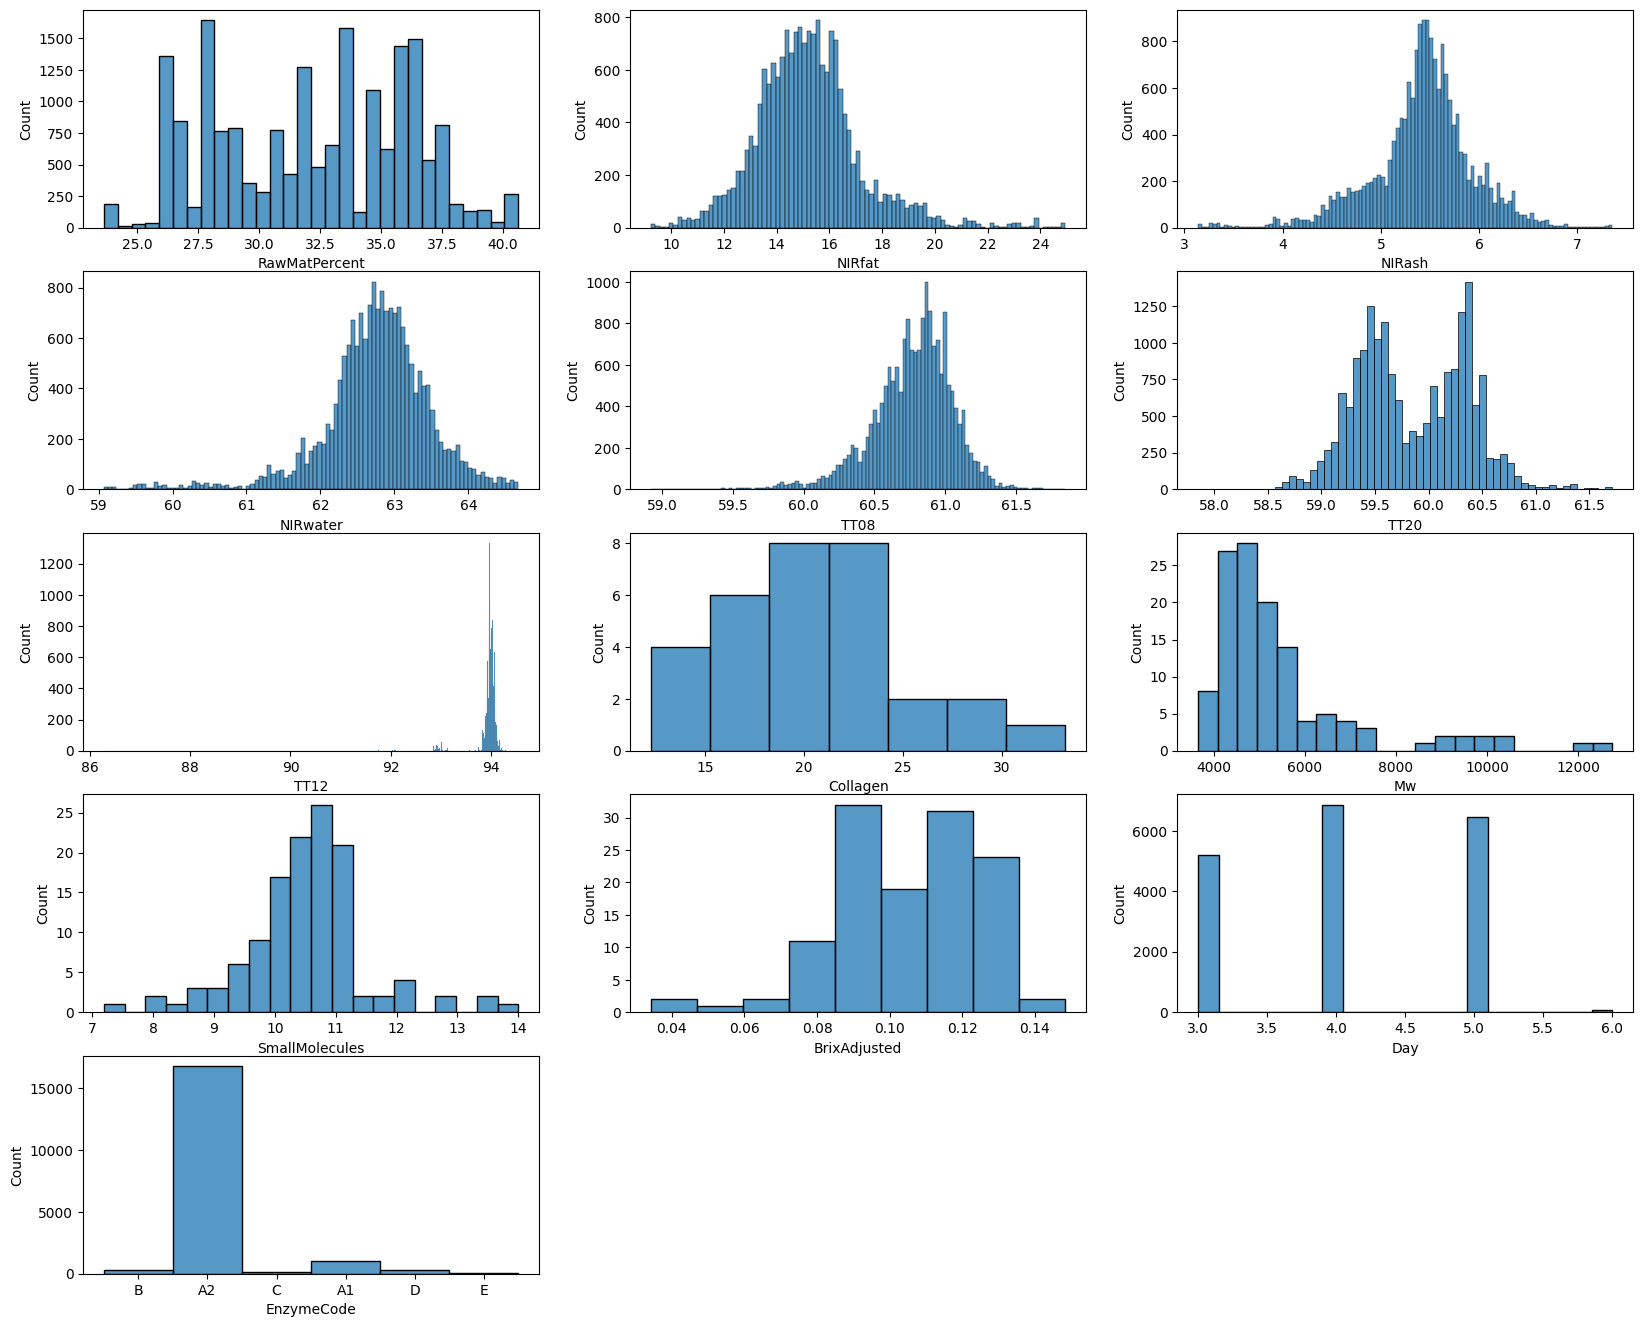

In [37]:
fig = plt.figure(figsize=(20,30))
antall_kolonnner = len(behandlet_data_normalprod_enzym.columns)
rute_nett = fig.add_gridspec(9,3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), behandlet_data_normalprod_enzym):
  if nummer % 3 == 0:
    n += 1
    i = 0
  ax = fig.add_subplot(rute_nett[n,i])
  sns.histplot(x=indeks, data = behandlet_data_normalprod_enzym)
  i += 1

Fordeling av Enzymtyper i normal produksjon datasett

In [38]:
# Fordelingen i "EnzymeCode"

frekvens = behandlet_data_normalprod_enzym['EnzymeCode'].value_counts()
andel = behandlet_data_normalprod_enzym['EnzymeCode'].value_counts(normalize=True) * 100

enzymtyper_data = pd.DataFrame({
    'Frekvens': frekvens,
    'Andel': andel
})

print(enzymtyper_data)

    Frekvens      Andel
A2     16771  90.322059
A1      1001   5.390995
B        320   1.723395
D        270   1.454115
C        139   0.748600
E         67   0.360836


Fordeling i markert del av datasettet

In [39]:
# Lager et datasett for Collagen med mindre markeringer enn resterende kvalitesmålinger
collagen_markert = behandlet_data_normalprod_enzym.dropna(subset=['Collagen'])

# Lager et datasett for de resterende kvalitetsmålinger
kvalitetsmålinger_markert = behandlet_data_normalprod_enzym.dropna(subset=['Mw',
                                                          'SmallMolecules',
                                                          'BrixAdjusted'])

Fordeling i normal produksjon datasett med Collagen som markert respons

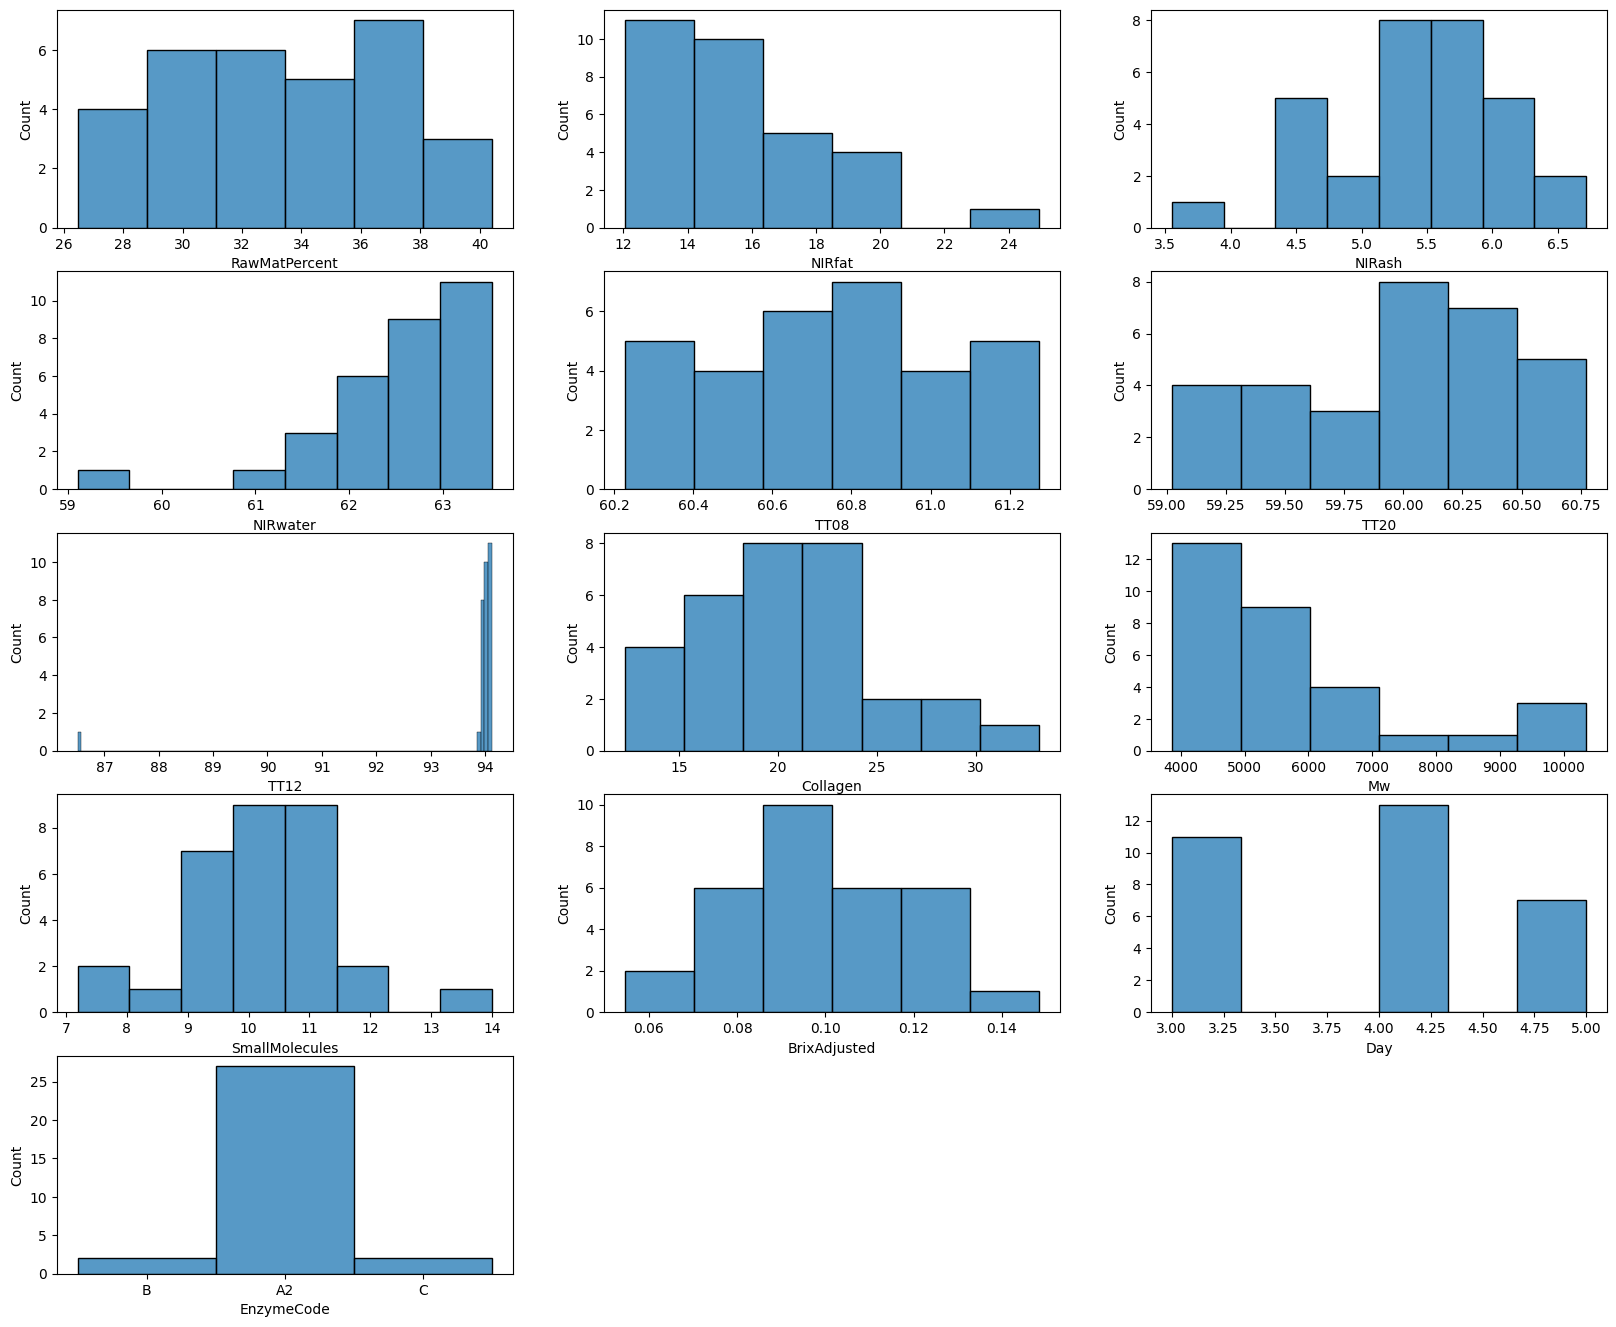

In [40]:
fig = plt.figure(figsize=(20,30))
antall_kolonnner = len(collagen_markert.columns)
rute_nett = fig.add_gridspec(9,3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), collagen_markert):
  if nummer % 3 == 0:
    n += 1
    i = 0
  ax = fig.add_subplot(rute_nett[n,i])
  sns.histplot(x=indeks, data = collagen_markert)
  i += 1

Fordeling av Enzymtyper i normal produksjon datasett med Collagen som respons

In [41]:
# Fordelingen i "EnzymeCode"

frekvens = collagen_markert['EnzymeCode'].value_counts()
andel = collagen_markert['EnzymeCode'].value_counts(normalize=True) * 100

enzymtyper_data = pd.DataFrame({
    'Frekvens': frekvens,
    'Andel': andel
})

print(enzymtyper_data)

    Frekvens      Andel
A2        27  87.096774
B          2   6.451613
C          2   6.451613


Fordeling i normal produksjon datasett med resterende kvalitetsmålinger som markert respons

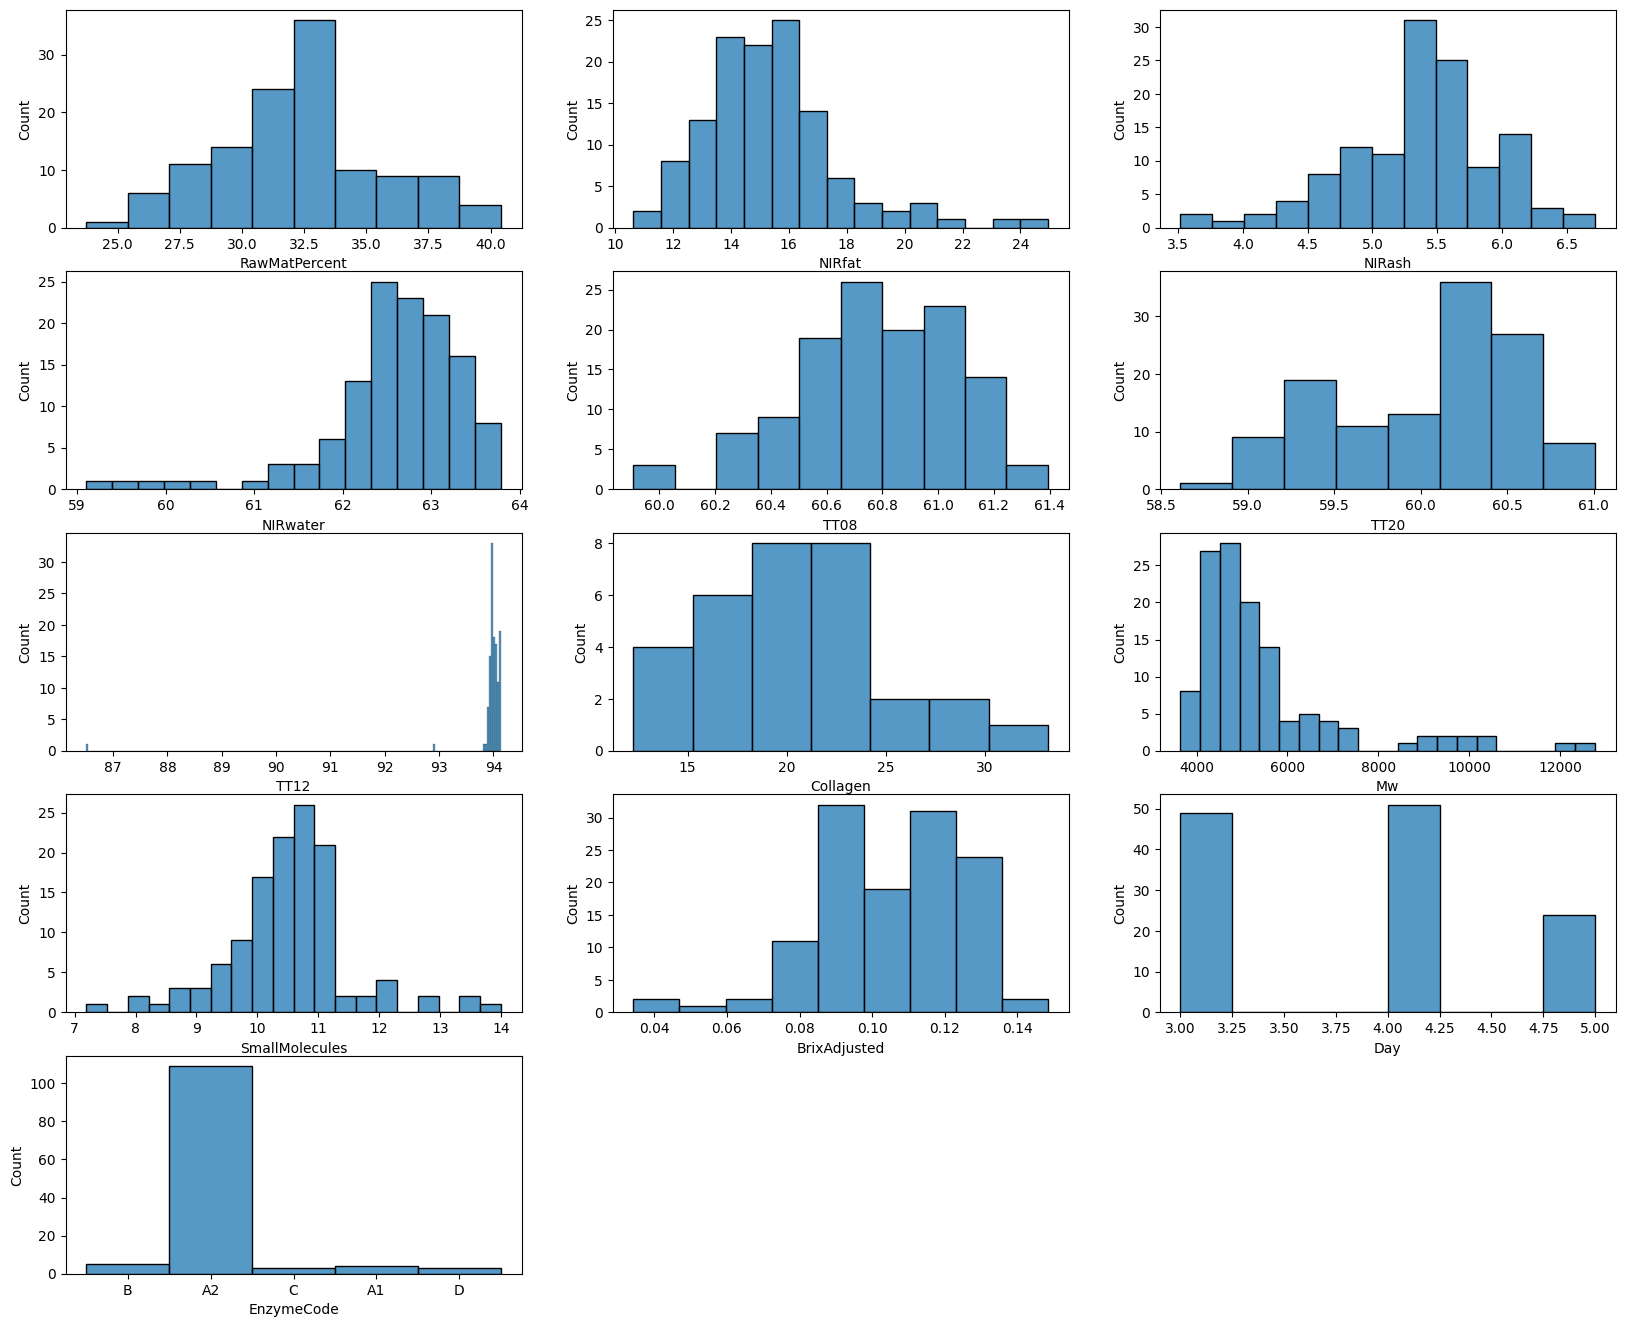

In [42]:
fig = plt.figure(figsize=(20,30))
antall_kolonnner = len(kvalitetsmålinger_markert.columns)
rute_nett = fig.add_gridspec(9,3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), kvalitetsmålinger_markert):
  if nummer % 3 == 0:
    n += 1
    i = 0
  ax = fig.add_subplot(rute_nett[n,i])
  sns.histplot(x=indeks, data = kvalitetsmålinger_markert)
  i += 1

Fordeling av Enzymtyper i normal produksjon datasett med andre kvalitetsmålinger som respons

In [43]:
# Fordelingen i "EnzymeCode"

frekvens = kvalitetsmålinger_markert['EnzymeCode'].value_counts()
andel = kvalitetsmålinger_markert['EnzymeCode'].value_counts(normalize=True) * 100

enzymtyper_data = pd.DataFrame({
    'Frekvens': frekvens,
    'Andel': andel
})

print(enzymtyper_data)

    Frekvens      Andel
A2       109  87.903226
B          5   4.032258
A1         4   3.225806
C          3   2.419355
D          3   2.419355


Fordeling i umarkert del av datasettet

In [44]:
# Lager et datasett for Collagen med mindre markeringer enn resterende kvalitesmålinger
collagen_umarkert = behandlet_data_normalprod_enzym[behandlet_data_normalprod_enzym['Collagen'].isna()]


# Lager et datasett for de resterende kvalitetsmålinger
kvalitetsmålinger_umarkert = behandlet_data_normalprod_enzym[behandlet_data_normalprod_enzym['Mw'].isna()]

Fordeling i datasett med Collagen som markert respons

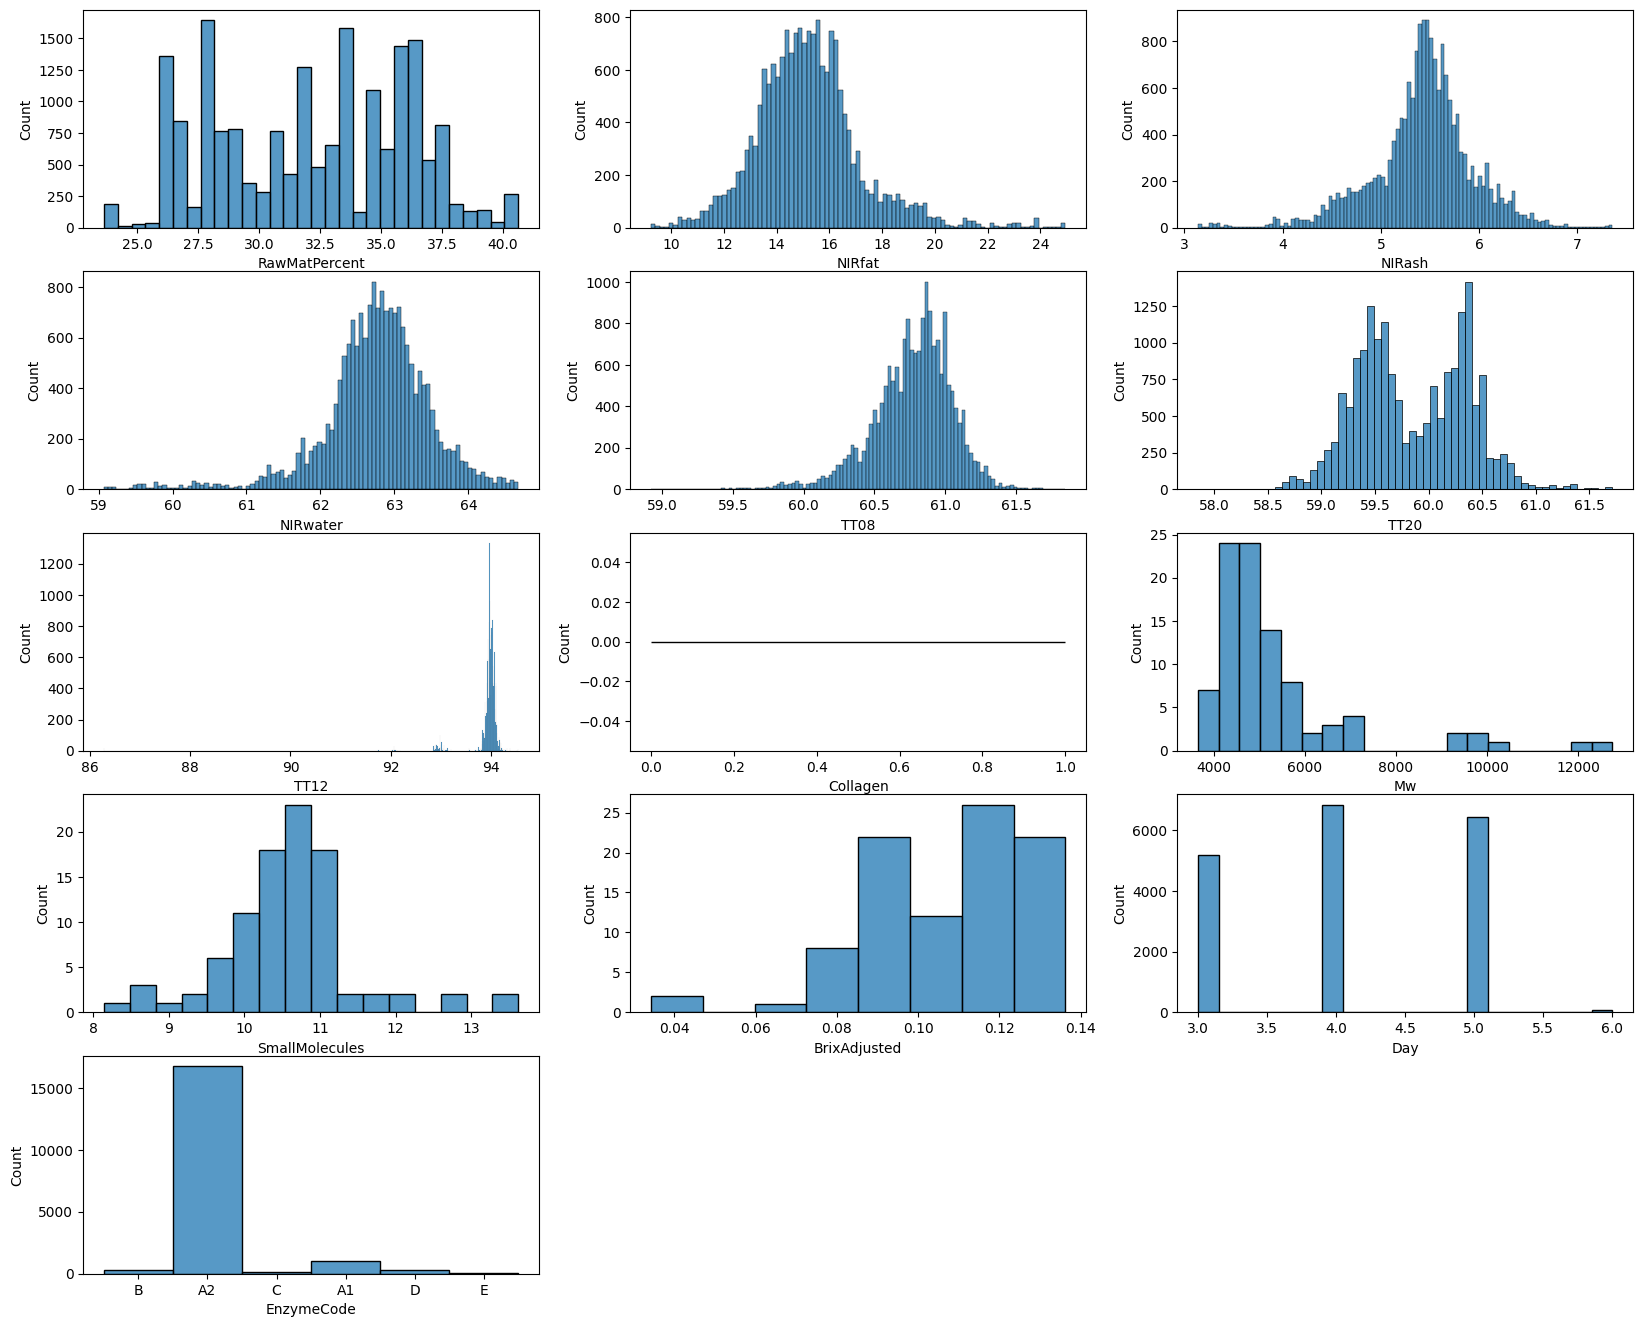

In [45]:
fig = plt.figure(figsize=(20,30))
antall_kolonnner = len(collagen_umarkert.columns)
rute_nett = fig.add_gridspec(9,3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), collagen_umarkert):
  if nummer % 3 == 0:
    n += 1
    i = 0
  ax = fig.add_subplot(rute_nett[n,i])
  sns.histplot(x=indeks, data = collagen_umarkert)
  i += 1

Fordeling av Enzymtyper i datasett med Collagen som umarkert respons

In [46]:
# Fordelingen i "EnzymeCode"

frekvens = collagen_umarkert['EnzymeCode'].value_counts()
andel = collagen_umarkert['EnzymeCode'].value_counts(normalize=True) * 100

enzymtyper_data = pd.DataFrame({
    'Frekvens': frekvens,
    'Andel': andel
})

print(enzymtyper_data)

    Frekvens      Andel
A2     16744  90.327453
A1      1001   5.400011
B        318   1.715488
D        270   1.456546
C        137   0.739062
E         67   0.361439


Fordeling i datasett med resterende kvalitetsmålinger som umarkert respons

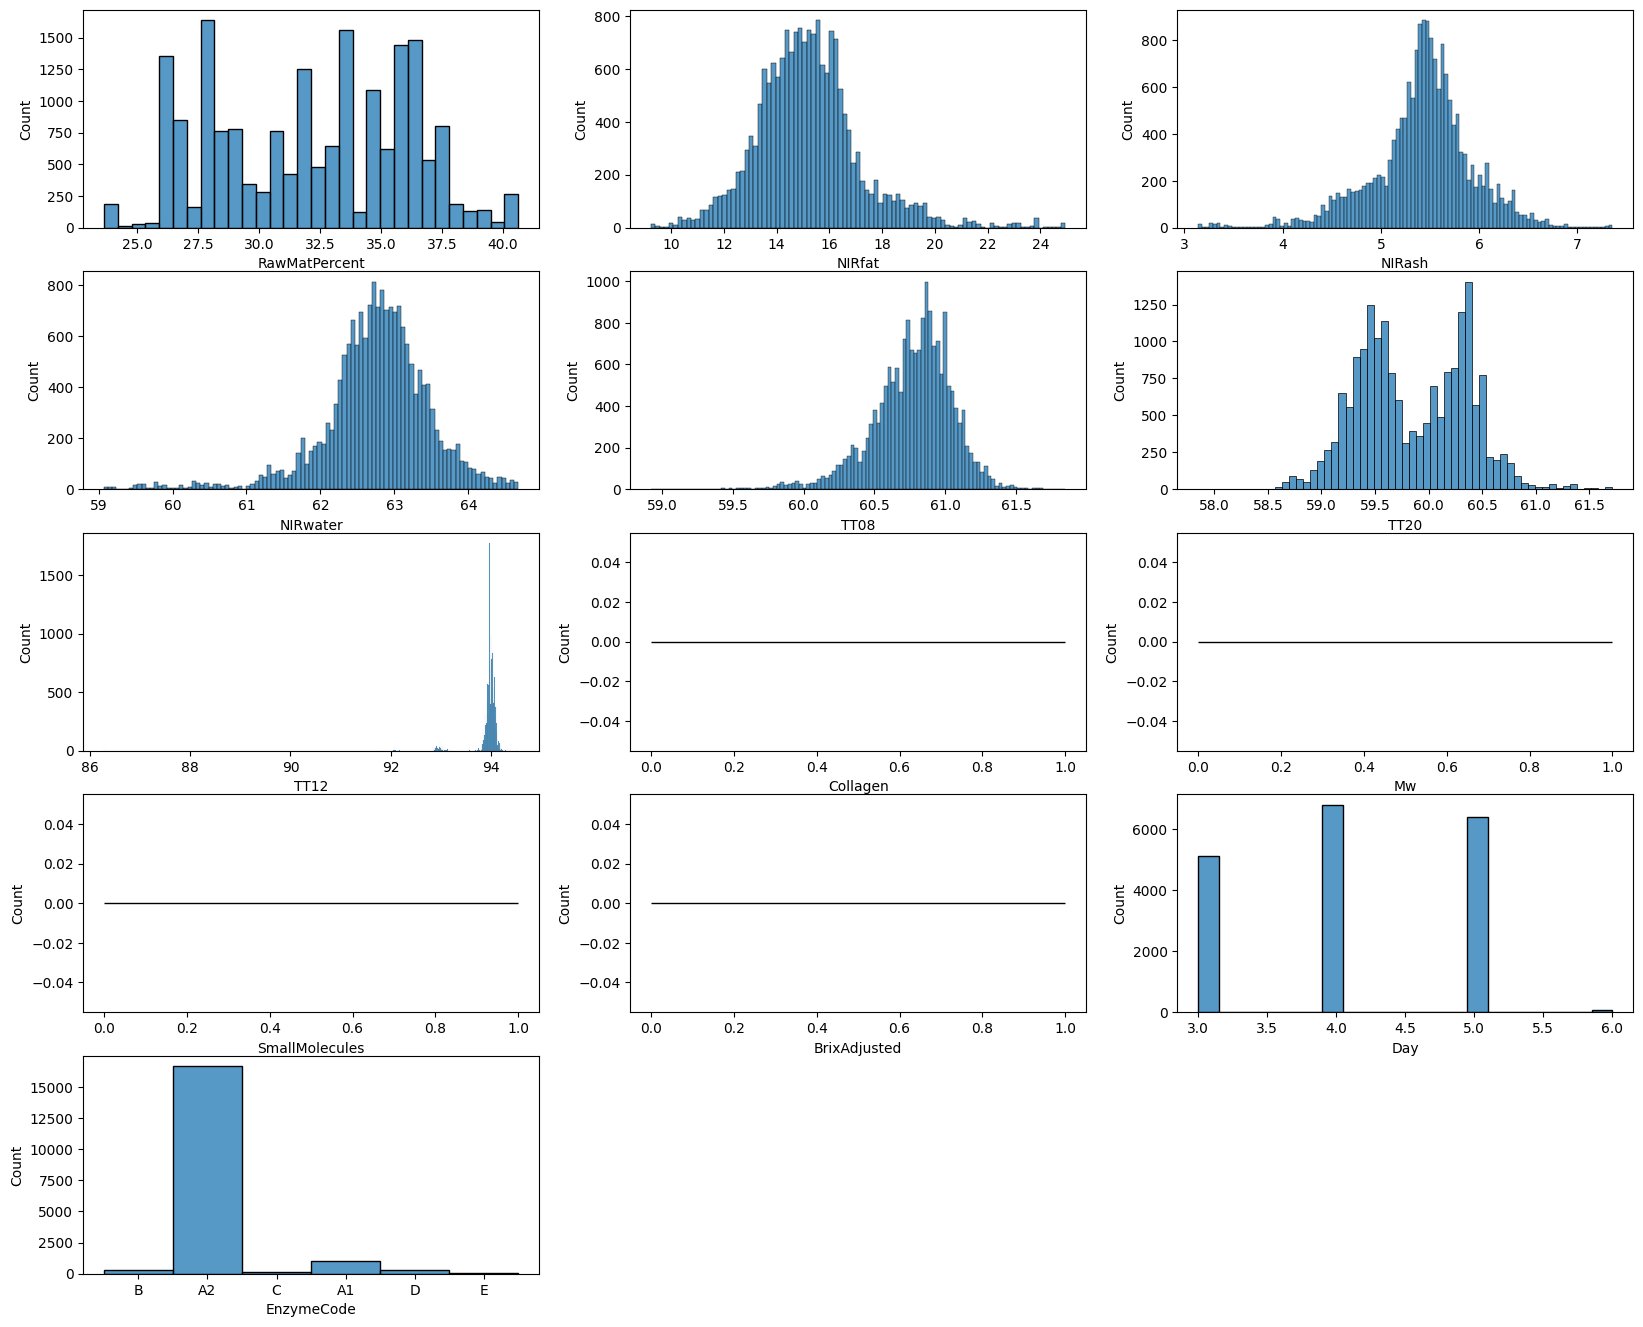

In [47]:
fig = plt.figure(figsize=(20,30))
antall_kolonnner = len(kvalitetsmålinger_umarkert.columns)
rute_nett = fig.add_gridspec(9,3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), kvalitetsmålinger_umarkert):
  if nummer % 3 == 0:
    n += 1
    i = 0
  ax = fig.add_subplot(rute_nett[n,i])
  sns.histplot(x=indeks, data = kvalitetsmålinger_umarkert)
  i += 1

Fordeling av Enzymtyper i datasett med andre kvalitetsmålinger som umarkert respons

In [48]:
# Fordelingen i "EnzymeCode"

frekvens = kvalitetsmålinger_umarkert['EnzymeCode'].value_counts()
andel = kvalitetsmålinger_umarkert['EnzymeCode'].value_counts(normalize=True) * 100

enzymtyper_data = pd.DataFrame({
    'Frekvens': frekvens,
    'Andel': andel
})

print(enzymtyper_data)

    Frekvens      Andel
A2     16662  90.338321
A1       997   5.405552
B        315   1.707872
D        267   1.447625
C        136   0.737367
E         67   0.363262


# Dataforståelse av behandlet datasett: Design produksjon

Oppdeling av data for hver kvalitetsmåling under design produksjon

In [18]:
behandlet_data_designprod = copy.deepcopy(behandlet_data)
behandlet_data_designprod['Day'] = (behandlet_data_designprod.index.isocalendar().day)

# Ekskluderer de dager med "design"-produksjon
behandlet_data_designprod = behandlet_data_designprod[~behandlet_data_designprod['Day'].isin([3,4,5,6])]

enzym_data = rå_data.merge(behandlet_data_designprod,
                           left_index=True,
                           right_index=True,
                           how='inner',
                           suffixes=('','_drop'))['EnzymeCode']

behandlet_data_designprod_enzym = pd.concat([behandlet_data_designprod, enzym_data], axis=1)
behandlet_data_designprod_enzym = behandlet_data_designprod_enzym.iloc[:, 6:]

In [19]:
behandlet_data_designprod_enzym.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10568 entries, 2022-10-31 17:37:00 to 2023-06-13 23:59:00
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RawMatPercent   10568 non-null  float64
 1   NIRfat          10568 non-null  float64
 2   NIRash          10568 non-null  float64
 3   NIRwater        10568 non-null  float64
 4   TT08            10568 non-null  float64
 5   TT20            10568 non-null  float64
 6   TT12            10568 non-null  float64
 7   Collagen        58 non-null     float64
 8   Mw              336 non-null    float64
 9   SmallMolecules  336 non-null    float64
 10  BrixAdjusted    336 non-null    float64
 11  Day             10568 non-null  UInt32 
 12  EnzymeCode      10568 non-null  object 
dtypes: UInt32(1), float64(11), object(1)
memory usage: 1.4+ MB


Fordeling i variablene datasett med design produksjon

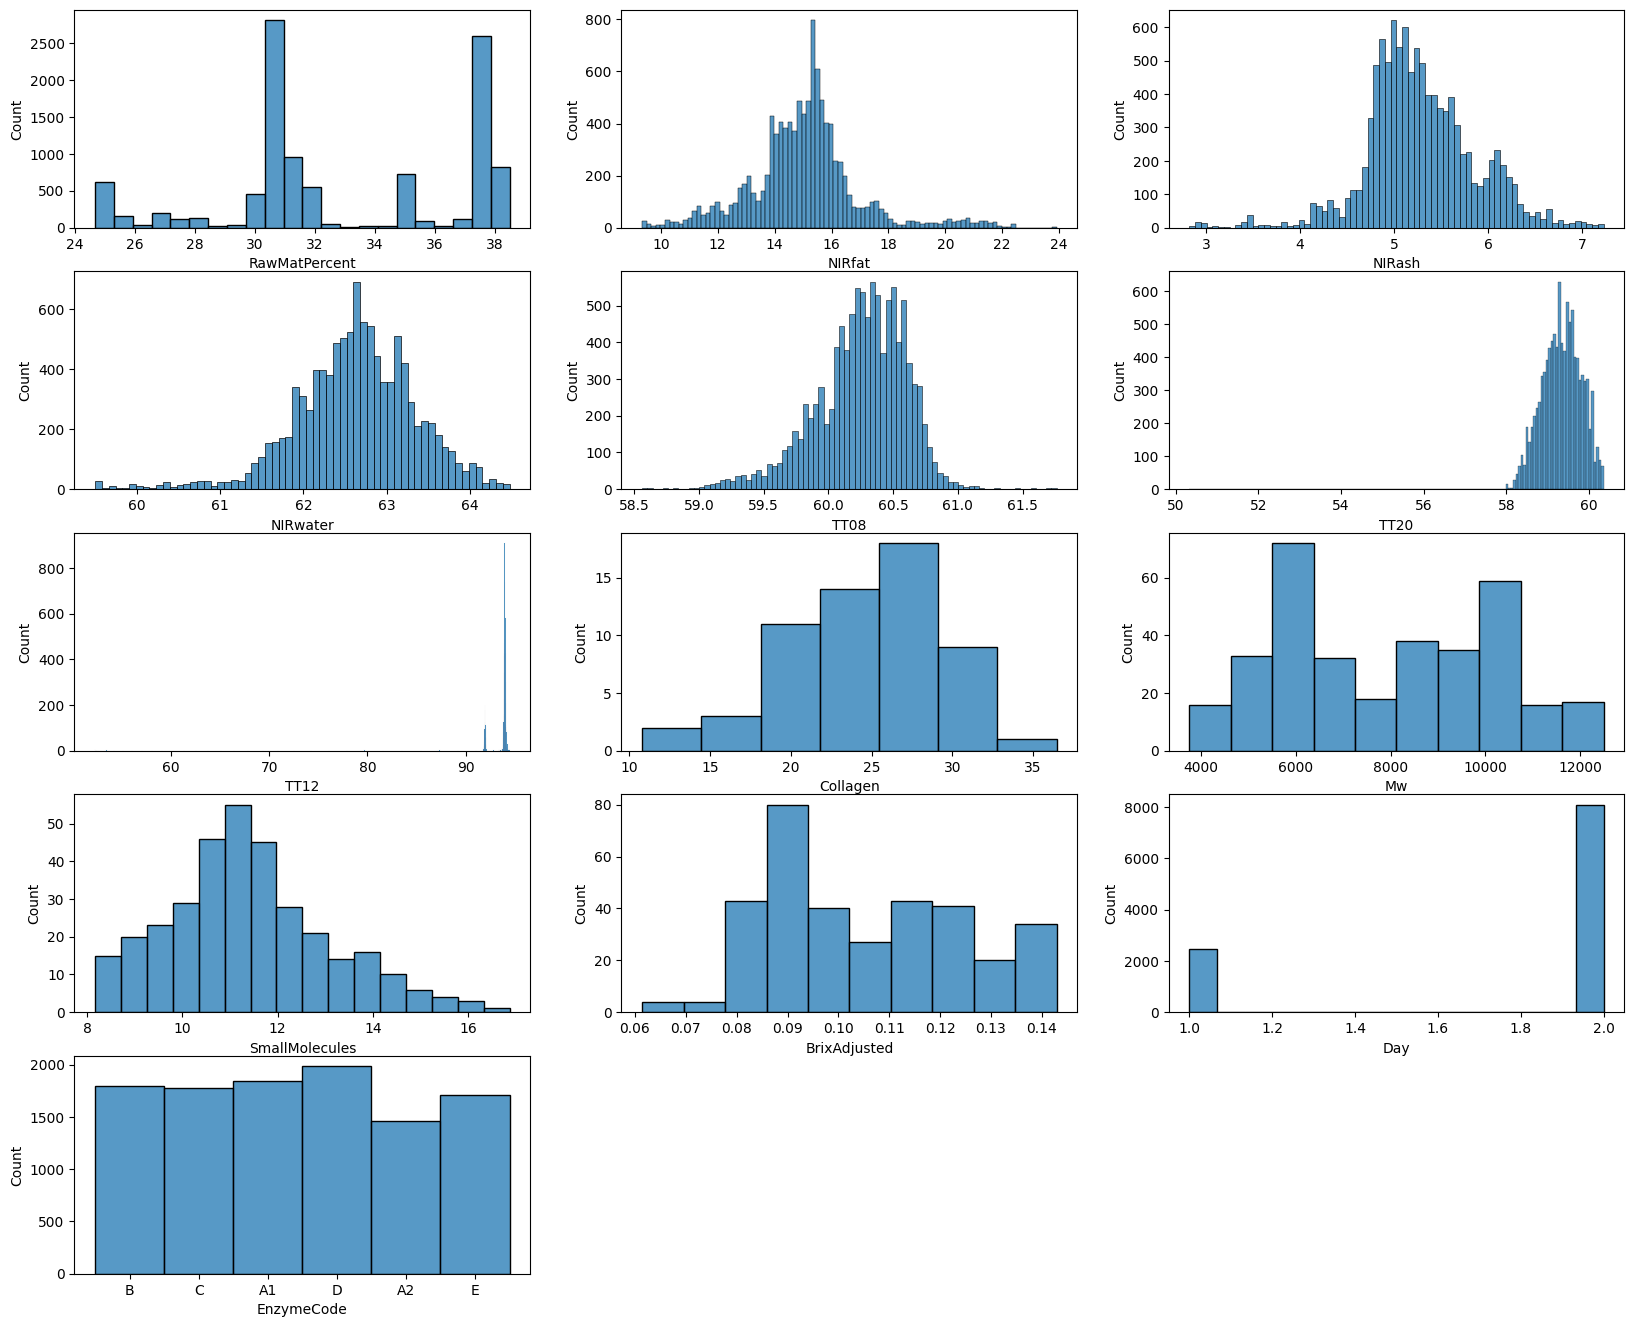

In [20]:
fig = plt.figure(figsize=(20,30))
antall_kolonnner = len(behandlet_data_designprod_enzym.columns)
rute_nett = fig.add_gridspec(9,3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), behandlet_data_designprod_enzym):
  if nummer % 3 == 0:
    n += 1
    i = 0
  ax = fig.add_subplot(rute_nett[n,i])
  sns.histplot(x=indeks, data = behandlet_data_designprod_enzym)
  i += 1

Fordeling av Enzymtyper i normal produksjon datasett

In [22]:
# Fordelingen i "EnzymeCode"

frekvens = behandlet_data_designprod_enzym['EnzymeCode'].value_counts()
andel = behandlet_data_designprod_enzym['EnzymeCode'].value_counts(normalize=True) * 100

enzymtyper_data = pd.DataFrame({
    'Frekvens': frekvens,
    'Andel': andel
})

enzymtyper_data

,Frekvens,Andel
D,1986,18.792581
A1,1844,17.448902
B,1793,16.966313
C,1777,16.814913
E,1706,16.143073
A2,1462,13.834217


Fordeling i markert del av datasettet

In [23]:
# Lager et datasett for Collagen med mindre markeringer enn resterende kvalitesmålinger
collagen_markert = behandlet_data_designprod_enzym.dropna(subset=['Collagen'])

# Lager et datasett for de resterende kvalitetsmålinger
kvalitetsmålinger_markert = behandlet_data_designprod_enzym.dropna(subset=['Mw',
                                                          'SmallMolecules',
                                                          'BrixAdjusted'])

Fordeling i design produksjon datasett med Collagen som markert respons

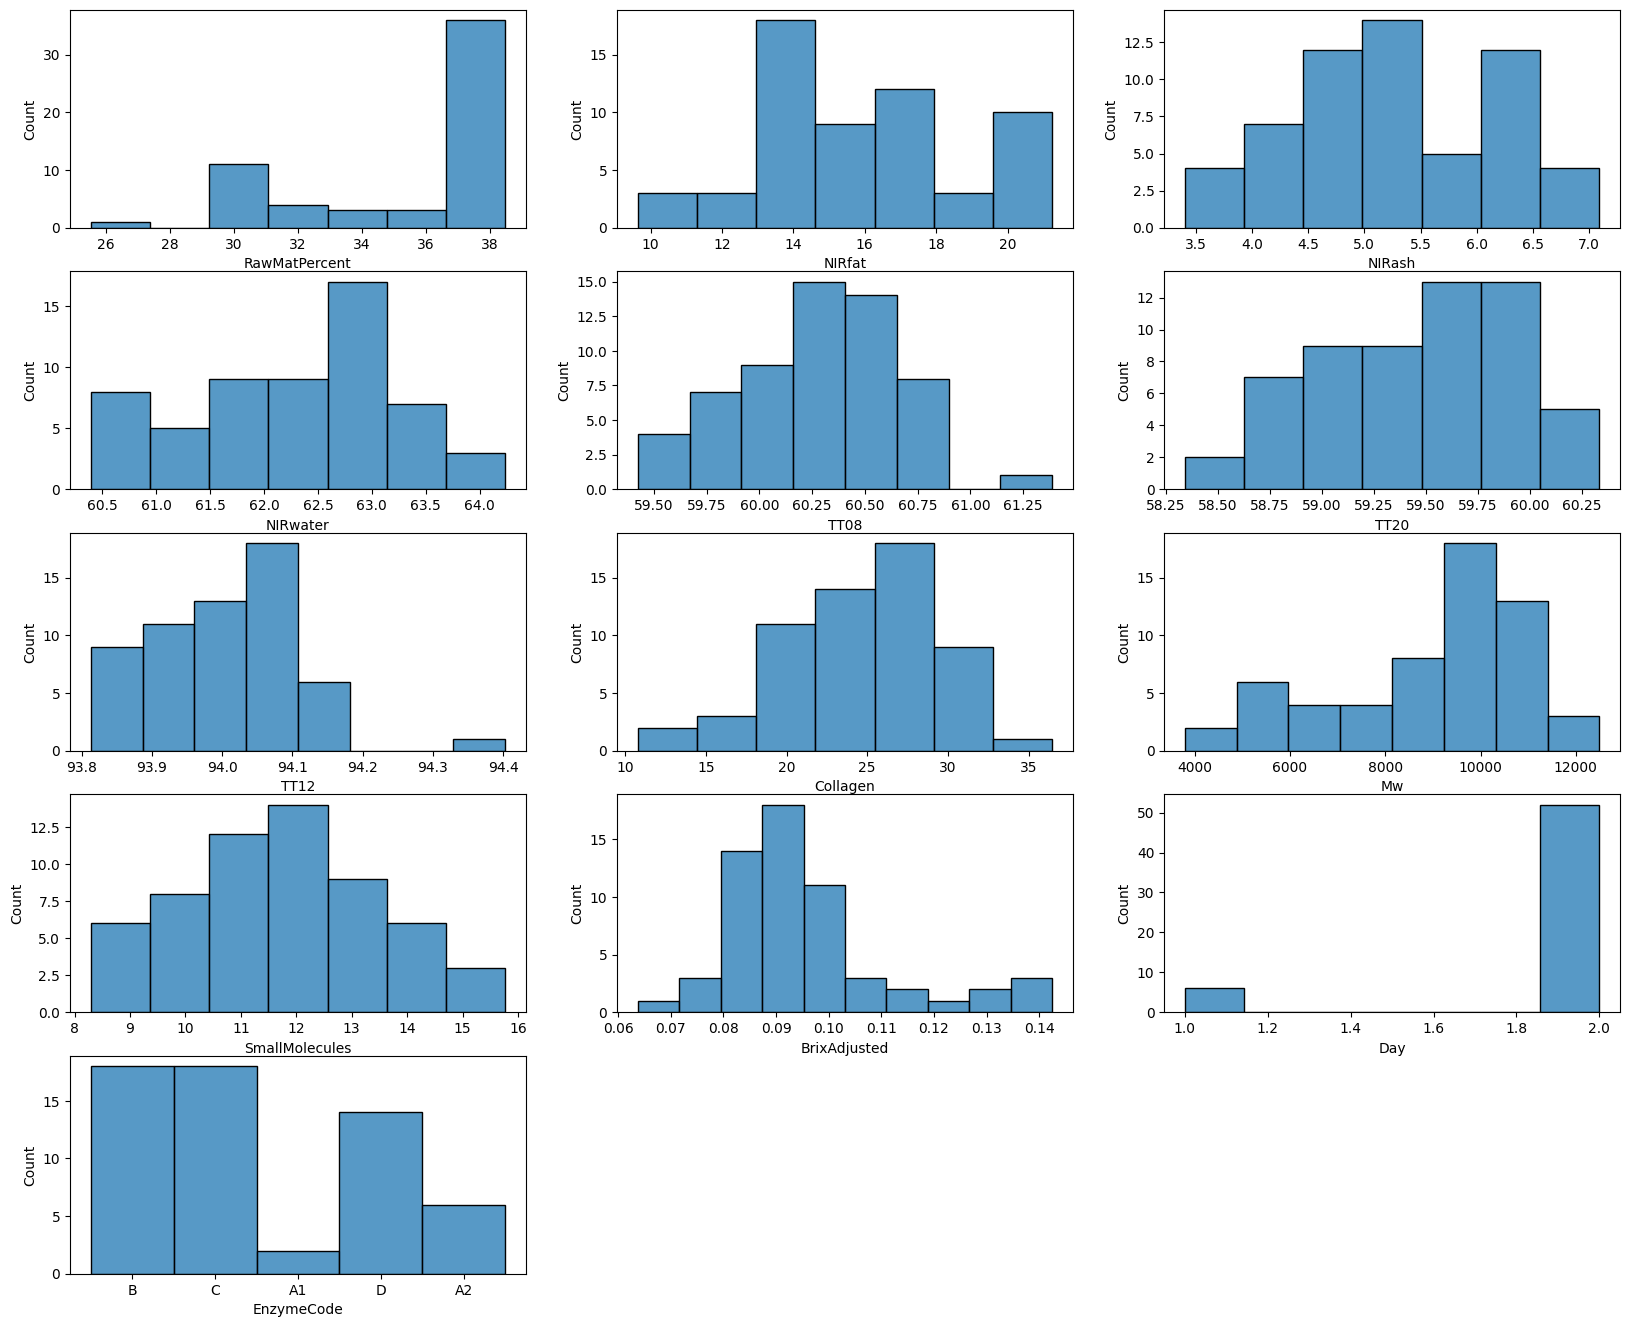

In [24]:
fig = plt.figure(figsize=(20,30))
antall_kolonnner = len(collagen_markert.columns)
rute_nett = fig.add_gridspec(9,3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), collagen_markert):
  if nummer % 3 == 0:
    n += 1
    i = 0
  ax = fig.add_subplot(rute_nett[n,i])
  sns.histplot(x=indeks, data = collagen_markert)
  i += 1

Fordeling av Enzymtyper i design produksjon datasett med Collagen som respons

In [ ]:
# Fordelingen i "EnzymeCode"

frekvens = collagen_markert['EnzymeCode'].value_counts()
andel = collagen_markert['EnzymeCode'].value_counts(normalize=True) * 100

enzymtyper_data = pd.DataFrame({
    'Frekvens': frekvens,
    'Andel': andel
})

print(enzymtyper_data)

    Frekvens      Andel
A2        27  87.096774
B          2   6.451613
C          2   6.451613


Fordeling i design produksjon datasett med resterende kvalitetsmålinger som markert respons

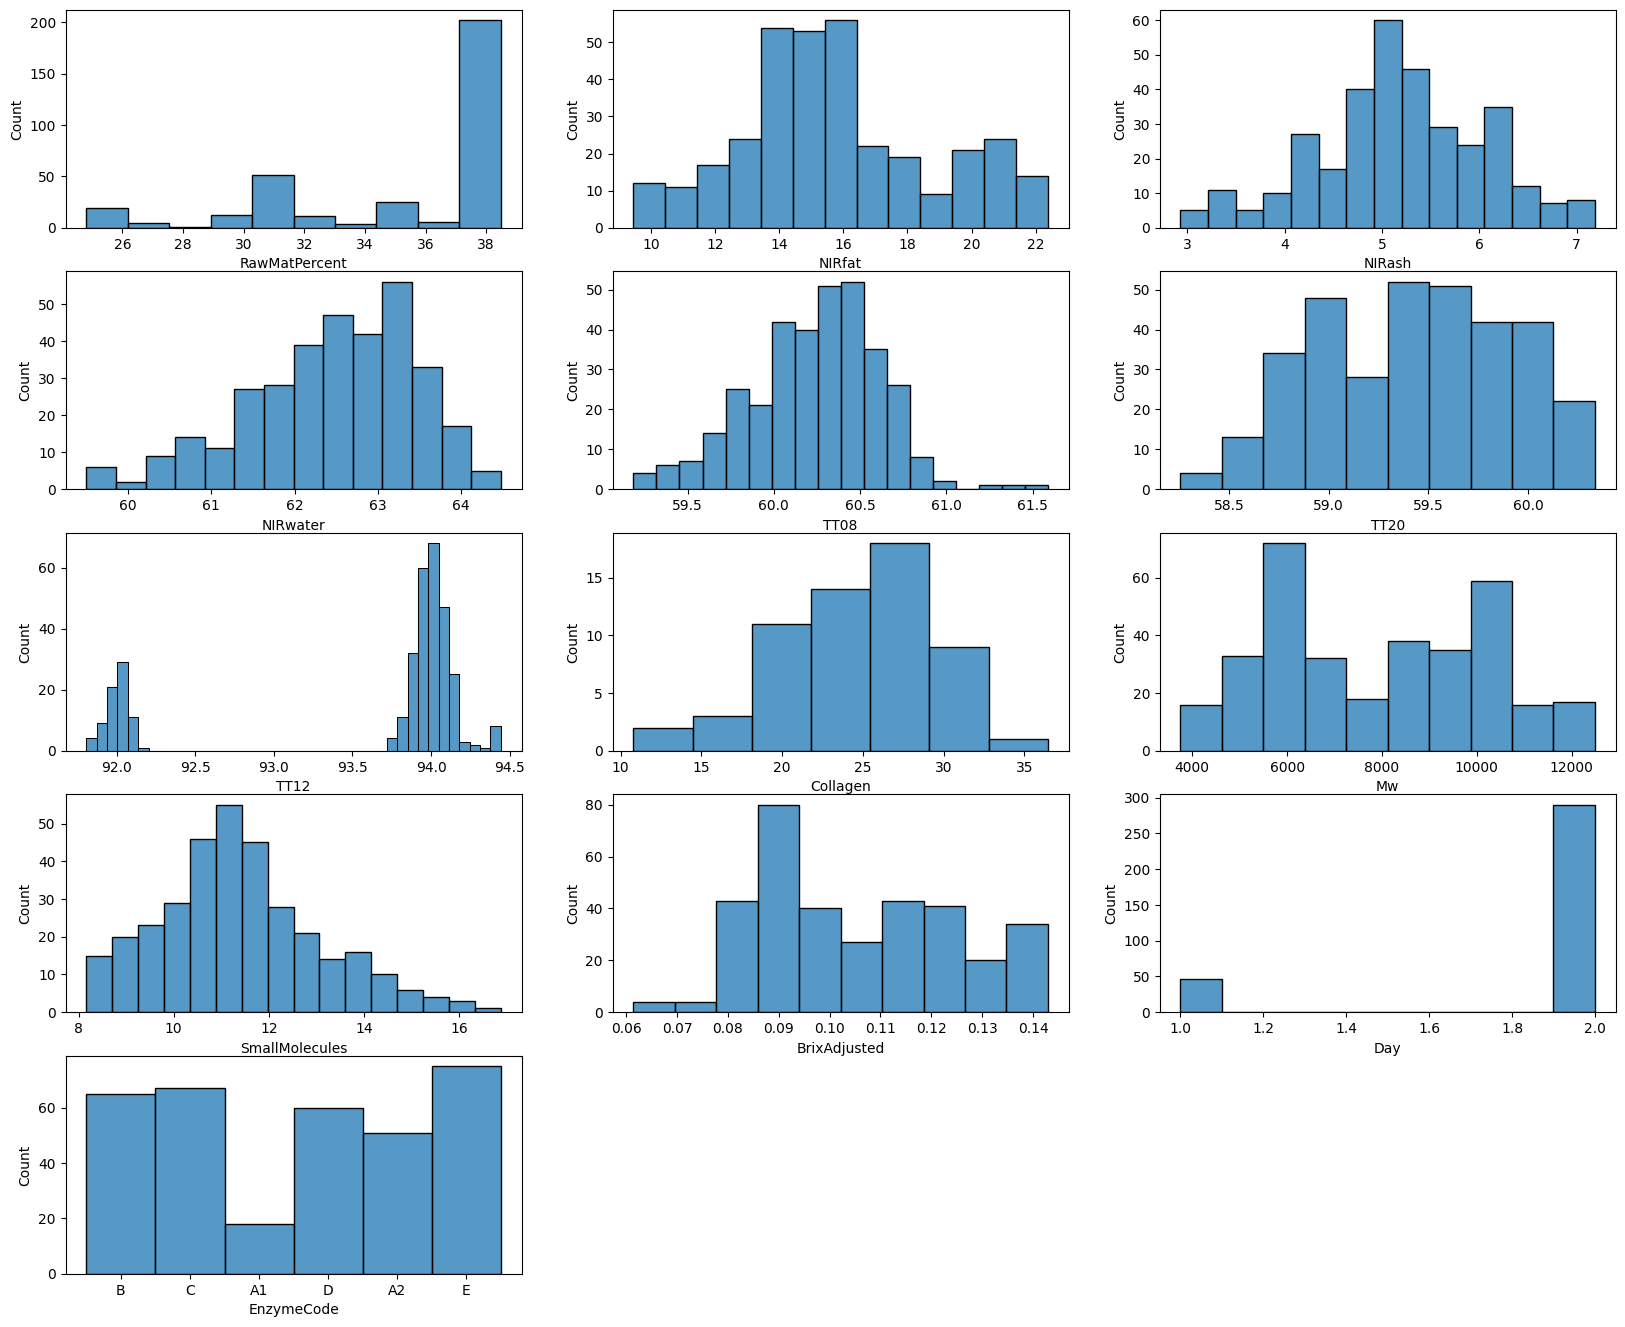

In [25]:
fig = plt.figure(figsize=(20,30))
antall_kolonnner = len(kvalitetsmålinger_markert.columns)
rute_nett = fig.add_gridspec(9,3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), kvalitetsmålinger_markert):
  if nummer % 3 == 0:
    n += 1
    i = 0
  ax = fig.add_subplot(rute_nett[n,i])
  sns.histplot(x=indeks, data = kvalitetsmålinger_markert)
  i += 1

Fordeling av Enzymtyper i normal produksjon datasett med andre kvalitetsmålinger som respons

In [26]:
# Fordelingen i "EnzymeCode"

frekvens = kvalitetsmålinger_markert['EnzymeCode'].value_counts()
andel = kvalitetsmålinger_markert['EnzymeCode'].value_counts(normalize=True) * 100

enzymtyper_data = pd.DataFrame({
    'Frekvens': frekvens,
    'Andel': andel
})
enzymtyper_data

,Frekvens,Andel
E,75,22.321429
C,67,19.940476
B,65,19.345238
D,60,17.857143
A2,51,15.178571
A1,18,5.357143


Fordeling i umarkert del av datasettet

In [28]:
# Lager et datasett for Collagen med mindre markeringer enn resterende kvalitesmålinger
collagen_umarkert = behandlet_data_designprod_enzym[behandlet_data_designprod_enzym['Collagen'].isna()]


# Lager et datasett for de resterende kvalitetsmålinger
kvalitetsmålinger_umarkert = behandlet_data_designprod_enzym[behandlet_data_designprod_enzym['Mw'].isna()]

Fordeling i datasett med Collagen som markert respons

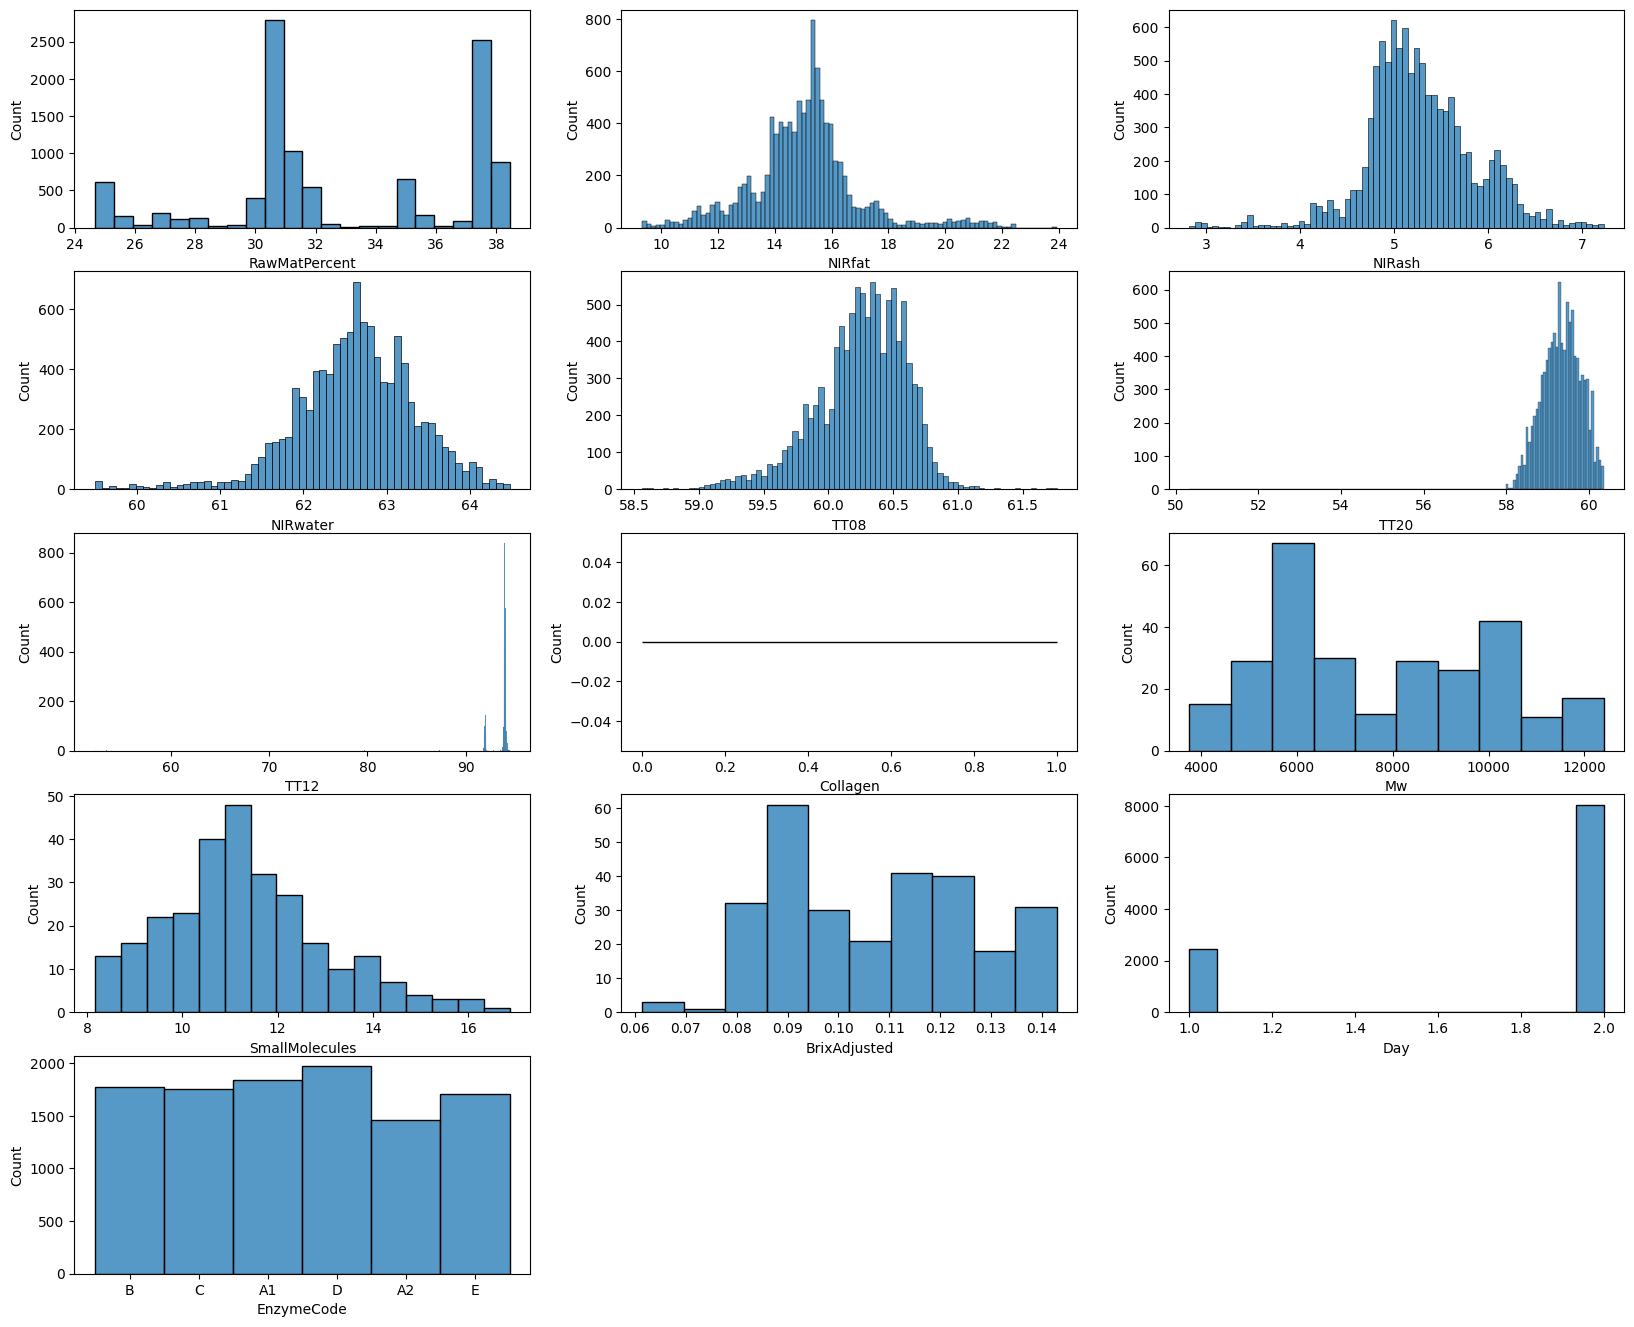

In [29]:
fig = plt.figure(figsize=(20,30))
antall_kolonnner = len(collagen_umarkert.columns)
rute_nett = fig.add_gridspec(9,3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), collagen_umarkert):
  if nummer % 3 == 0:
    n += 1
    i = 0
  ax = fig.add_subplot(rute_nett[n,i])
  sns.histplot(x=indeks, data = collagen_umarkert)
  i += 1

Fordeling av Enzymtyper i datasett med Collagen som umarkert respons

In [30]:
# Fordelingen i "EnzymeCode"

frekvens = collagen_umarkert['EnzymeCode'].value_counts()
andel = collagen_umarkert['EnzymeCode'].value_counts(normalize=True) * 100

enzymtyper_data = pd.DataFrame({
    'Frekvens': frekvens,
    'Andel': andel
})

print(enzymtyper_data)

    Frekvens      Andel
D       1972  18.763083
A1      1842  17.526166
B       1775  16.888677
C       1759  16.736441
E       1706  16.232160
A2      1456  13.853473


Fordeling i datasett med resterende kvalitetsmålinger som umarkert respons

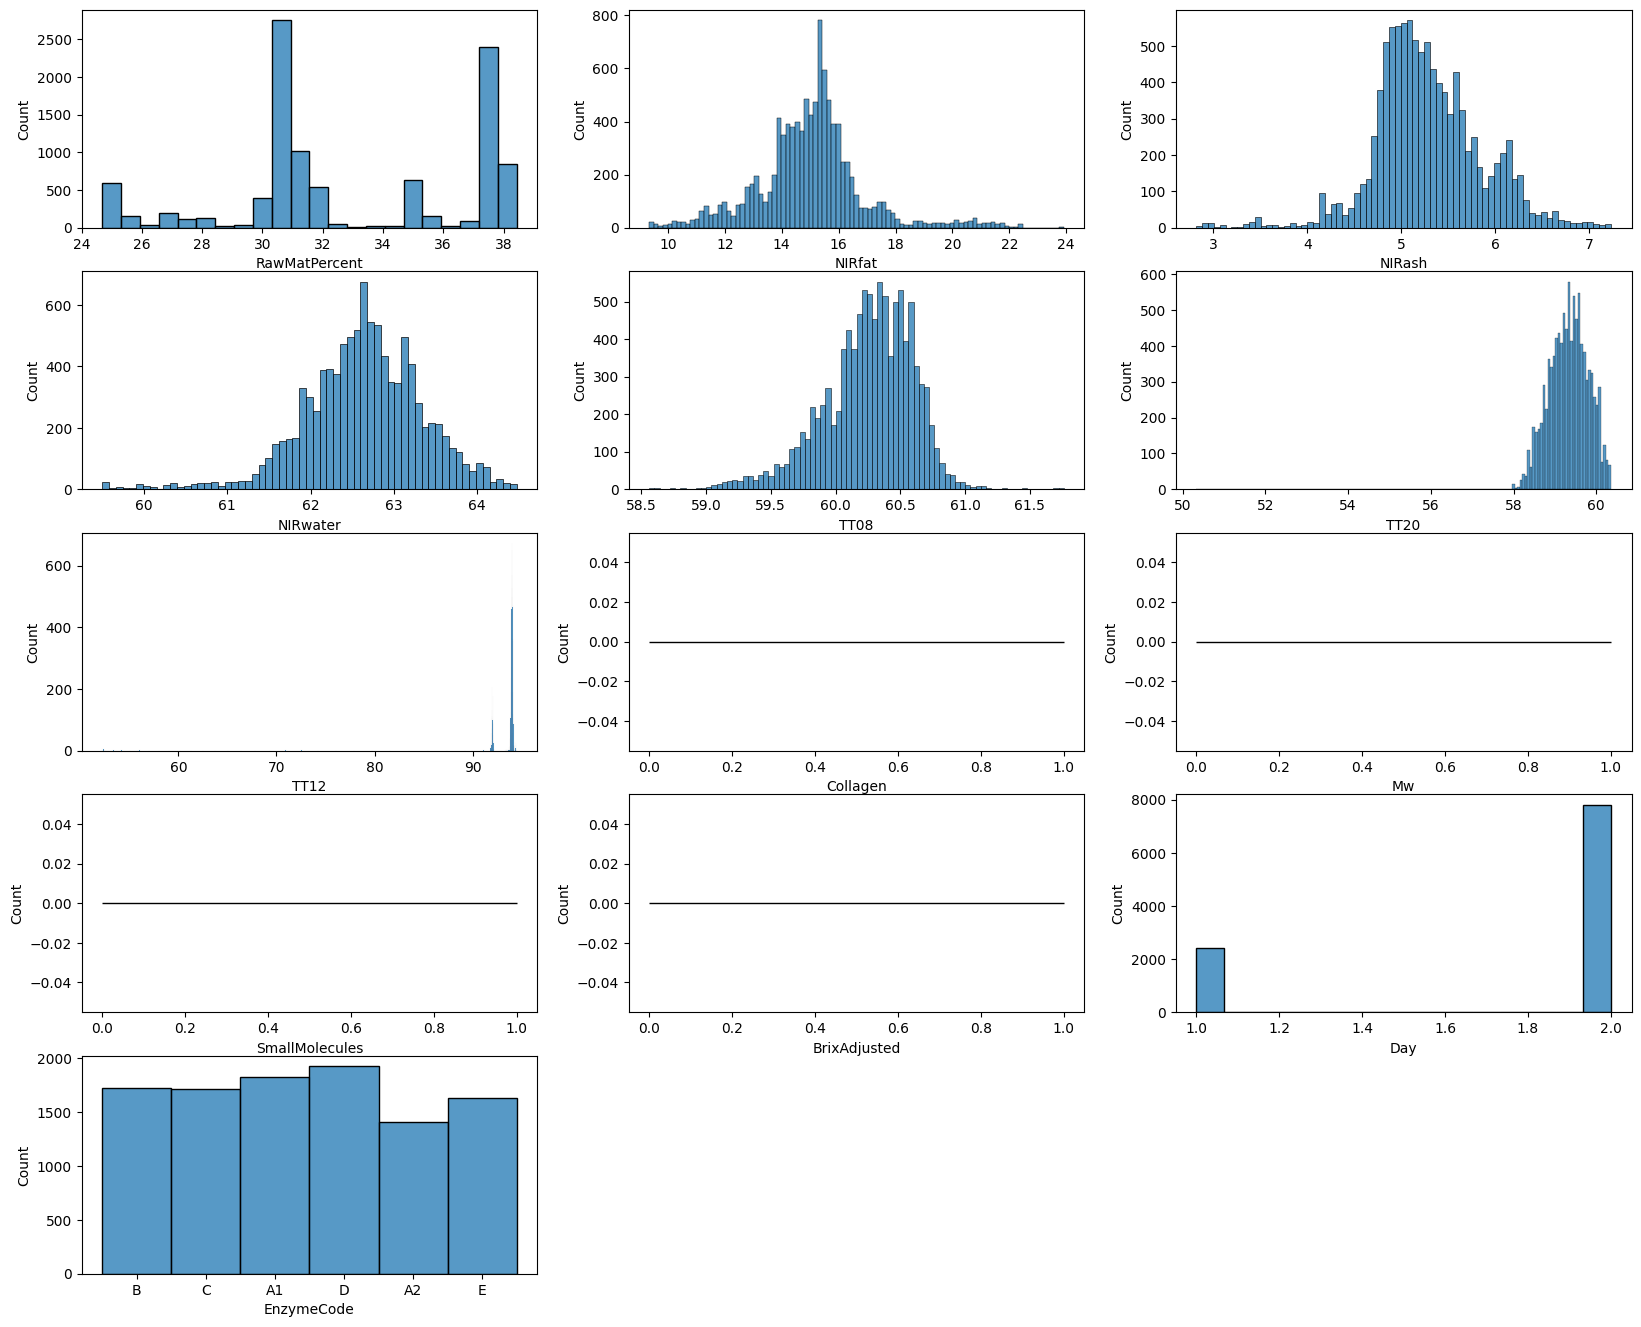

In [31]:
fig = plt.figure(figsize=(20,30))
antall_kolonnner = len(kvalitetsmålinger_umarkert.columns)
rute_nett = fig.add_gridspec(9,3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), kvalitetsmålinger_umarkert):
  if nummer % 3 == 0:
    n += 1
    i = 0
  ax = fig.add_subplot(rute_nett[n,i])
  sns.histplot(x=indeks, data = kvalitetsmålinger_umarkert)
  i += 1

Fordeling av Enzymtyper i datasett med andre kvalitetsmålinger som umarkert respons

In [32]:
# Fordelingen i "EnzymeCode"

frekvens = kvalitetsmålinger_umarkert['EnzymeCode'].value_counts()
andel = kvalitetsmålinger_umarkert['EnzymeCode'].value_counts(normalize=True) * 100

enzymtyper_data = pd.DataFrame({
    'Frekvens': frekvens,
    'Andel': andel
})
enzymtyper_data

,Frekvens,Andel
D,1926,18.823299
A1,1826,17.845973
B,1728,16.888194
C,1710,16.712275
E,1631,15.940188
A2,1411,13.790070


# Oppdeling av datasett

Oppdeling av data for hver kvalitetsmåling

In [49]:
# Lager en kopi av datasett med en kvalitesmåling som respons hver
collagen_data = behandlet_data.drop(columns=['Mw',
                                             'SmallMolecules',
                                             'BrixAdjusted'])

mw_data = behandlet_data.drop(columns=['Collagen',
                                       'SmallMolecules',
                                       'BrixAdjusted'])

smallmoleclues_data = behandlet_data.drop(columns=['Collagen',
                                                   'Mw',
                                                   'BrixAdjusted'])

brixadjusted_data = behandlet_data.drop(columns=['Collagen',
                                                 'Mw',
                                                 'SmallMolecules'])

Oppdeling av data for hver kvalitetsmåling (normal produksjon)

In [50]:
# Eksluderer kolonne "Day" fra datasettet
behandlet_data_normalprod.drop(columns= ["Day"], inplace = True)

# Lager en kopi av datasett med en kvalitesmåling under normalproduksjon
# som respons hver
collagen_data_normal = behandlet_data_normalprod.drop(columns=['Mw',
                                                               'SmallMolecules',
                                                               'BrixAdjusted'])

mw_data_normal = behandlet_data_normalprod.drop(columns=['Collagen',
                                                         'SmallMolecules',
                                                         'BrixAdjusted'])

smallmoleclues_data_normal = behandlet_data_normalprod.drop(columns=['Collagen',
                                                                     'Mw',
                                                                     'BrixAdjusted'])

brixadjusted_data_normal = behandlet_data_normalprod.drop(columns=['Collagen',
                                                                   'Mw',
                                                                   'SmallMolecules'])

Oppdeling av data for hver kvalitetsmåling (design produksjon)

In [51]:
# Eksluderer kolonne "Day" fra datasettet
behandlet_data_designprod.drop(columns= ["Day"], inplace = True)

# Lager en kopi av datasett med en kvalitesmåling under normalproduksjon
# som respons hver
collagen_data_design = behandlet_data_designprod.drop(columns=['Mw',
                                                               'SmallMolecules',
                                                               'BrixAdjusted'])

mw_data_design = behandlet_data_designprod.drop(columns=['Collagen',
                                                         'SmallMolecules',
                                                         'BrixAdjusted'])

smallmoleclues_data_design = behandlet_data_designprod.drop(columns=['Collagen',
                                                                     'Mw',
                                                                     'BrixAdjusted'])

brixadjusted_data_design = behandlet_data_designprod.drop(columns=['Collagen',
                                                                   'Mw',
                                                                   'SmallMolecules'])

Lagring av alle datasett som csv filer

In [52]:
collagen_data.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/collagen_data.csv')
mw_data.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/mw_data.csv')
smallmoleclues_data.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/smallmoleclues_data.csv')
brixadjusted_data.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/brixadjusted_data.csv')

collagen_data_normal.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/collagen_data_normal.csv')
mw_data_normal.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/mw_data_normal.csv')
smallmoleclues_data_normal.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/smallmoleclues_data_normal.csv')
brixadjusted_data_normal.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/brixadjusted_data_normal.csv')

collagen_data_design.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/collagen_data_design.csv')
mw_data_design.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/mw_data_design.csv')
smallmoleclues_data_design.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/smallmoleclues_data_design.csv')
brixadjusted_data_design.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/brixadjusted_data_design.csv')